In [1]:
# Imorting Standard Libraries
# Setting up the working directory
import os

# Library For Statistical Computation
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

# For numerical computation
import numpy as np

#import json
# from json import dumps

# import html2json
# from html2json import collect

# Library For Data Analysis and Pre-Processing
import pandas as pd
pd.options.display.max_columns = None

# Using 'Plotly' Library for More Detailed and Interactive Visualizations
import plotly
import plotly.io as pio
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from plotly import tools
import plotly.graph_objs as go
from plotly.utils import PlotlyJSONEncoder
init_notebook_mode()

# Library for visualizing
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Rehular Expression Library 
import re

# Library to avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting up the working directory
os.chdir("C:\\Users\\Dheer")

#Checking the current working directory
os.getcwd()

'C:\\Users\\Dheer'

In [3]:
# Loading the In_Page_Optimization Dataset which is in ('.CSV') Format
In_Page_Opt_raw = pd.read_csv('Artificial Intelligence in Healthcare Market.csv')

# Making another instance of the orginal data
In_Page_Opt = In_Page_Opt_raw.copy()

In [4]:
# Viewing Top 5 Observations of the  RAW dataset
In_Page_Opt.head()

url  \
0  https://www.marketsandmarkets.com/Market-Repor...   
1  https://www.marketsandmarkets.com/PressRelease...   
2  https://www.prnewswire.com/news-releases/artif...   
3  https://www.accenture.com/us-en/insight-artifi...   
4  https://www.psmarketresearch.com/market-analys...   

                                               title  \
0  Artificial intelligence in healthcare market s...   
1  Artificial intelligence in healthcare market w...   
2  Artificial intelligence in healthcare market w...   
3  Artificial intelligence (ai) in healthcare | a...   
4  Artificial intelligence in healthcare market s...   

                                          meta_title  \
0                                                 --   
1                                                 --   
2                                                 --   
3  Artificial intelligence (ai) in healthcare | a...   
4                                                 --   

                                    meta_description  \
0  [216 pages report] artificial intelligence in ...   
1                                                NaN   
2  Chicago, december 17, 2018 /prnewswire/ -- acc...   
3  Ai in healthcare represents technologies helpi...   
4  Artificial intelligence (ai) in healthcare mar...   

                                       meta_keywords  \
0       Artificial Intelligence in Healthcare Market   
1      Artificial Intelligence in Healthcare Market    
2  MarketsandMarkets, Computer Hardware, Computer...   
3  artificial intelligence in healthcare,  ai in ...   
4  Artificial Intelligence in Healthcare Market S...   

                                                  h1  \
0       Artificial intelligence in healthcare market   
1  Artificial intelligence in healthcare market, ...   
2  Artificial intelligence in healthcare market w...   
3  Artificial intelligence (ai): healthcare's new...   
4  Artificial intelligence (ai) in healthcare mar...   

                                                  h2  \
0  Artificial intelligence in healthcare market b...   
1  Artificial intelligence in healthcare market w...   
2                     Also from this source, explore   
3  Consulting, ai: an engine for growth, ai think...   
4                                                 --   

                                                  h3  \
0  Processor to hold largest market in hardware s...   
1  Information & communications technology, semic...   
2  Network as a service market worth $21.7 billio...   
3  , consulting home, technology consulting, digi...   
4                                                 --   

                                                  h4  h5  h6  
0  Growth opportunities and latent adjacency in a...  --  --  
1  Iot and digitization, cloud computing, mobilit...  --  --  
2                                                 --  --  --  
3  Top 10 ai applications, ahip accenture webinar...  --  --  
4                                    Explore reports  --  --

In [5]:
# Checking information and datypes of the dataset
In_Page_Opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
url                 40 non-null object
title               40 non-null object
meta_title          40 non-null object
meta_description    37 non-null object
meta_keywords       38 non-null object
h1                  39 non-null object
h2                  38 non-null object
h3                  39 non-null object
h4                  40 non-null object
h5                  40 non-null object
h6                  40 non-null object
dtypes: object(11)
memory usage: 3.6+ KB


In [6]:
# Lets Check the Column Names of The Dataset
In_Page_Opt.columns

Index(['url', 'title', 'meta_title', 'meta_description', 'meta_keywords', 'h1',
       'h2', 'h3', 'h4', 'h5', 'h6'],
      dtype='object')

In [7]:
# Lets Change All the Data-types of COlumns to Categorical Data-types
for col in In_Page_Opt:
    In_Page_Opt[col] = In_Page_Opt[col].astype('category')

In [8]:
# Lets Check the Dataframe After Changing the datatypes
In_Page_Opt.dtypes

url                 category
title               category
meta_title          category
meta_description    category
meta_keywords       category
h1                  category
h2                  category
h3                  category
h4                  category
h5                  category
h6                  category
dtype: object

In [9]:
# Checking the null values count
In_Page_Opt.isnull().sum()

url                 0
title               0
meta_title          0
meta_description    3
meta_keywords       2
h1                  1
h2                  2
h3                  1
h4                  0
h5                  0
h6                  0
dtype: int64

In [10]:
# Viewing Top 5 Observations of the  RAW dataset
In_Page_Opt

url  \
0   https://www.marketsandmarkets.com/Market-Repor...   
1   https://www.marketsandmarkets.com/PressRelease...   
2   https://www.prnewswire.com/news-releases/artif...   
3   https://www.accenture.com/us-en/insight-artifi...   
4   https://www.psmarketresearch.com/market-analys...   
5   https://www.healthcarefinancenews.com/news/hea...   
6   https://www.gminsights.com/industry-analysis/h...   
7   https://bigdata-madesimple.com/artificial-inte...   
8   https://www.cio.com/article/3299303/3-ways-art...   
9            http://www.digitaljournal.com/pr/3510900   
10  https://www.tractica.com/research/artificial-i...   
11  https://www.forbes.com/sites/brucejapsen/2018/...   
12  https://www.marketwatch.com/press-release/arti...   
13  https://globenewswire.com/news-release/2018/12...   
14  https://www.transparencymarketresearch.com/art...   
15  https://www.pymnts.com/news/artificial-intelli...   
16  https://www.plugandplaytechcenter.com/resource...   
17  https://en.wikipedia.org/wiki/Artificial_intel...   
18  https://www.inkwoodresearch.com/reports/artifi...   
19  https://www.beckershospitalreview.com/artifici...   
20  https://www.cbinsights.com/research/report/ai-...   
21  https://www.futuremarketinsights.com/reports/a...   
22        https://www.entrepreneur.com/article/325463   
23  https://novatiosolutions.com/10-common-applica...   
24  https://www.mordorintelligence.com/industry-re...   
25  https://www.erienewsnow.com/story/39826380/glo...   
26                      https://theaaih.org/about-us/   
27                  https://aiworld.com/Healthcare-AI   
28  https://www.grandviewresearch.com/industry-ana...   
29  https://hitconsultant.net/2018/12/17/infograph...   
30  https://thenextweb.com/contributors/2018/12/22...   
31  https://www.chthealthcare.com/blog/artificial-...   
32  https://www.businesswire.com/news/home/2019010...   
33  https://singularityhub.com/2019/02/15/how-ai-i...   
34                https://svn.bmj.com/content/2/4/230   
35  https://store.frost.com/artificial-intelligenc...   
36  https://www.himssconference.org/updates/how-wi...   
37  https://www.quora.com/Who-are-the-major-market...   
38  https://www.himss.eu/sites/himsseu/files/educa...   
39  https://www.datamintelligence.com/research-rep...   

                                                title  \
0   Artificial intelligence in healthcare market s...   
1   Artificial intelligence in healthcare market w...   
2   Artificial intelligence in healthcare market w...   
3   Artificial intelligence (ai) in healthcare | a...   
4   Artificial intelligence in healthcare market s...   
5   Healthcare ai market expected to surge from $2...   
6   Healthcare artificial intelligence market shar...   
7   Artificial intelligence in healthcare worth $3...   
8   3 ways artificial intelligence is changing the...   
9   Artificial intelligence (ai) in healthcare mar...   
10  Artificial intelligence  for healthcare applic...   
11  Healthcare's artificial intelligence market ma...   
12  Artificial intelligence in healthcare market s...   
13  Global artificial intelligence (ai) in healthc...   
14  Artificial intelligence (ai) in healthcare mar...   
15  Ai healthcare market projected to reach $36b |...   
16              Artificial intelligence in healthcare   
17  Artificial intelligence in healthcare - wikipedia   
18  Artificial intelligence in healthcare market |...   
19  Ai in healthcare market to grow to $36.1b by 2025   
20  The ai industry series: top healthcare ai tren...   
21  Artificial intelligence in healthcare market 2...   
22  Artificial intelligence changing healthcare fo...   
23  10 common applications of artificial intellige...   
24  Artificial intelligence in medicine market | g...   
25  Global artificial intelligence in healthcare m...   
26  About us | aaih - alliance for artificial inte...   
27      Ai in healthcare - ai world conference & expo   
28  Artificial intelligence in healthcare market s...   
29

In [11]:
# Lets Save all the Column names in a seperate variable for easy accessing
col_names = ['url','title','meta_title','meta_description','meta_keywords','h1','h2','h3','h4','h5','h6']

# Lets print the variable and check all the columns
print(col_names)

['url', 'title', 'meta_title', 'meta_description', 'meta_keywords', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6']


#  Checking For The  Focus Keyword {artificial intelligence in healthcare market} Whether It Is Present In Each Column Or Not , for {Exact/Continous Phrase}

In [12]:
# Loading the original dataframe and saving it into a new variable for doing Exact Phrase Focus Kyeword Match
InPageOpt_EP = In_Page_Opt_raw.copy()

InPageOpt_EP.head()

url  \
0  https://www.marketsandmarkets.com/Market-Repor...   
1  https://www.marketsandmarkets.com/PressRelease...   
2  https://www.prnewswire.com/news-releases/artif...   
3  https://www.accenture.com/us-en/insight-artifi...   
4  https://www.psmarketresearch.com/market-analys...   

                                               title  \
0  Artificial intelligence in healthcare market s...   
1  Artificial intelligence in healthcare market w...   
2  Artificial intelligence in healthcare market w...   
3  Artificial intelligence (ai) in healthcare | a...   
4  Artificial intelligence in healthcare market s...   

                                          meta_title  \
0                                                 --   
1                                                 --   
2                                                 --   
3  Artificial intelligence (ai) in healthcare | a...   
4                                                 --   

                                    meta_description  \
0  [216 pages report] artificial intelligence in ...   
1                                                NaN   
2  Chicago, december 17, 2018 /prnewswire/ -- acc...   
3  Ai in healthcare represents technologies helpi...   
4  Artificial intelligence (ai) in healthcare mar...   

                                       meta_keywords  \
0       Artificial Intelligence in Healthcare Market   
1      Artificial Intelligence in Healthcare Market    
2  MarketsandMarkets, Computer Hardware, Computer...   
3  artificial intelligence in healthcare,  ai in ...   
4  Artificial Intelligence in Healthcare Market S...   

                                                  h1  \
0       Artificial intelligence in healthcare market   
1  Artificial intelligence in healthcare market, ...   
2  Artificial intelligence in healthcare market w...   
3  Artificial intelligence (ai): healthcare's new...   
4  Artificial intelligence (ai) in healthcare mar...   

                                                  h2  \
0  Artificial intelligence in healthcare market b...   
1  Artificial intelligence in healthcare market w...   
2                     Also from this source, explore   
3  Consulting, ai: an engine for growth, ai think...   
4                                                 --   

                                                  h3  \
0  Processor to hold largest market in hardware s...   
1  Information & communications technology, semic...   
2  Network as a service market worth $21.7 billio...   
3  , consulting home, technology consulting, digi...   
4                                                 --   

                                                  h4  h5  h6  
0  Growth opportunities and latent adjacency in a...  --  --  
1  Iot and digitization, cloud computing, mobilit...  --  --  
2                                                 --  --  --  
3  Top 10 ai applications, ahip accenture webinar...  --  --  
4                                    Explore reports  --  --

In [13]:
# Resetting the Index 
InPageOpt_EP.reset_index()

index                                                url  \
0       0  https://www.marketsandmarkets.com/Market-Repor...   
1       1  https://www.marketsandmarkets.com/PressRelease...   
2       2  https://www.prnewswire.com/news-releases/artif...   
3       3  https://www.accenture.com/us-en/insight-artifi...   
4       4  https://www.psmarketresearch.com/market-analys...   
5       5  https://www.healthcarefinancenews.com/news/hea...   
6       6  https://www.gminsights.com/industry-analysis/h...   
7       7  https://bigdata-madesimple.com/artificial-inte...   
8       8  https://www.cio.com/article/3299303/3-ways-art...   
9       9           http://www.digitaljournal.com/pr/3510900   
10     10  https://www.tractica.com/research/artificial-i...   
11     11  https://www.forbes.com/sites/brucejapsen/2018/...   
12     12  https://www.marketwatch.com/press-release/arti...   
13     13  https://globenewswire.com/news-release/2018/12...   
14     14  https://www.transparencymarketresearch.com/art...   
15     15  https://www.pymnts.com/news/artificial-intelli...   
16     16  https://www.plugandplaytechcenter.com/resource...   
17     17  https://en.wikipedia.org/wiki/Artificial_intel...   
18     18  https://www.inkwoodresearch.com/reports/artifi...   
19     19  https://www.beckershospitalreview.com/artifici...   
20     20  https://www.cbinsights.com/research/report/ai-...   
21     21  https://www.futuremarketinsights.com/reports/a...   
22     22        https://www.entrepreneur.com/article/325463   
23     23  https://novatiosolutions.com/10-common-applica...   
24     24  https://www.mordorintelligence.com/industry-re...   
25     25  https://www.erienewsnow.com/story/39826380/glo...   
26     26                      https://theaaih.org/about-us/   
27     27                  https://aiworld.com/Healthcare-AI   
28     28  https://www.grandviewresearch.com/industry-ana...   
29     29  https://hitconsultant.net/2018/12/17/infograph...   
30     30  https://thenextweb.com/contributors/2018/12/22...   
31     31  https://www.chthealthcare.com/blog/artificial-...   
32     32  https://www.businesswire.com/news/home/2019010...   
33     33  https://singularityhub.com/2019/02/15/how-ai-i...   
34     34                https://svn.bmj.com/content/2/4/230   
35     35  https://store.frost.com/artificial-intelligenc...   
36     36  https://www.himssconference.org/updates/how-wi...   
37     37  https://www.quora.com/Who-are-the-major-market...   
38     38  https://www.himss.eu/sites/himsseu/files/educa...   
39     39  https://www.datamintelligence.com/research-rep...   

                                                title  \
0   Artificial intelligence in healthcare market s...   
1   Artificial intelligence in healthcare market w...   
2   Artificial intelligence in healthcare market w...   
3   Artificial intelligence (ai) in healthcare | a...   
4   Artificial intelligence in healthcare market s...   
5   Healthcare ai market expected to surge from $2...   
6   Healthcare artificial intelligence market shar...   
7   Artificial intelligence in healthcare worth $3...   
8   3 ways artificial intelligence is changing the...   
9   Artificial intelligence (ai) in healthcare mar...   
10  Artificial intelligence  for healthcare applic...   
11  Healthcare's artificial intelligence market ma...   
12  Artificial intelligence in healthcare market s...   
13  Global artificial intelligence (ai) in healthc...   
14  Artificial intelligence (ai) in healthcare mar...   
15  Ai healthcare market projected to reach $36b |...   
16              Artificial intelligence in healthcare   
17  Artificial intelligence in healthcare - wikipedia   
18  Artificial intelligence in healthcare market |...   
19  Ai in healthcare market to grow to $36.1b by 2025   
20  The ai industry series: top healthcare ai tren...   
21  Artificial intelligence in healthcare market 2...   
22  Artificial intelligence changing healthcare fo...   
23  10 comm

In [14]:
# Renaming Column Index to Rank
InPageOpt_EP.index = InPageOpt_EP.index.set_names(['Rank'])
InPageOpt_EP.head()

url  \
Rank                                                      
0     https://www.marketsandmarkets.com/Market-Repor...   
1     https://www.marketsandmarkets.com/PressRelease...   
2     https://www.prnewswire.com/news-releases/artif...   
3     https://www.accenture.com/us-en/insight-artifi...   
4     https://www.psmarketresearch.com/market-analys...   

                                                  title  \
Rank                                                      
0     Artificial intelligence in healthcare market s...   
1     Artificial intelligence in healthcare market w...   
2     Artificial intelligence in healthcare market w...   
3     Artificial intelligence (ai) in healthcare | a...   
4     Artificial intelligence in healthcare market s...   

                                             meta_title  \
Rank                                                      
0                                                    --   
1                                                    --   
2                                                    --   
3     Artificial intelligence (ai) in healthcare | a...   
4                                                    --   

                                       meta_description  \
Rank                                                      
0     [216 pages report] artificial intelligence in ...   
1                                                   NaN   
2     Chicago, december 17, 2018 /prnewswire/ -- acc...   
3     Ai in healthcare represents technologies helpi...   
4     Artificial intelligence (ai) in healthcare mar...   

                                          meta_keywords  \
Rank                                                      
0          Artificial Intelligence in Healthcare Market   
1         Artificial Intelligence in Healthcare Market    
2     MarketsandMarkets, Computer Hardware, Computer...   
3     artificial intelligence in healthcare,  ai in ...   
4     Artificial Intelligence in Healthcare Market S...   

                                                     h1  \
Rank                                                      
0          Artificial intelligence in healthcare market   
1     Artificial intelligence in healthcare market, ...   
2     Artificial intelligence in healthcare market w...   
3     Artificial intelligence (ai): healthcare's new...   
4     Artificial intelligence (ai) in healthcare mar...   

                                                     h2  \
Rank                                                      
0     Artificial intelligence in healthcare market b...   
1     Artificial intelligence in healthcare market w...   
2                        Also from this source, explore   
3     Consulting, ai: an engine for growth, ai think...   
4                                                    --   

                                                     h3  \
Rank                                                      
0     Processor to hold largest market in hardware s...   
1     Information & communications technology, semic...   
2     Network as a service market worth $21.7 billio...   
3     , consulting home, technology consulting, digi...   
4                                                    --   

                                                     h4  h5  h6  
Rank                                                             
0     Growth opportunities and latent adjacency in a...  --  --  
1     Iot and digitization, cloud computing, mobilit...  --  --  
2                                                    --  --  --  
3     Top 10 ai applications, ahip accenture webinar...  --  --  
4                                       Explore reports  --  --

In [15]:
# Index Starting from 0 and making it start from 1 for The Referencing It as Top Rank from {1}
InPageOpt_EP.index += 1

In [16]:
# Lets See The Data Frame As the Index is Starting From '1'
InPageOpt_EP.head()

url  \
Rank                                                      
1     https://www.marketsandmarkets.com/Market-Repor...   
2     https://www.marketsandmarkets.com/PressRelease...   
3     https://www.prnewswire.com/news-releases/artif...   
4     https://www.accenture.com/us-en/insight-artifi...   
5     https://www.psmarketresearch.com/market-analys...   

                                                  title  \
Rank                                                      
1     Artificial intelligence in healthcare market s...   
2     Artificial intelligence in healthcare market w...   
3     Artificial intelligence in healthcare market w...   
4     Artificial intelligence (ai) in healthcare | a...   
5     Artificial intelligence in healthcare market s...   

                                             meta_title  \
Rank                                                      
1                                                    --   
2                                                    --   
3                                                    --   
4     Artificial intelligence (ai) in healthcare | a...   
5                                                    --   

                                       meta_description  \
Rank                                                      
1     [216 pages report] artificial intelligence in ...   
2                                                   NaN   
3     Chicago, december 17, 2018 /prnewswire/ -- acc...   
4     Ai in healthcare represents technologies helpi...   
5     Artificial intelligence (ai) in healthcare mar...   

                                          meta_keywords  \
Rank                                                      
1          Artificial Intelligence in Healthcare Market   
2         Artificial Intelligence in Healthcare Market    
3     MarketsandMarkets, Computer Hardware, Computer...   
4     artificial intelligence in healthcare,  ai in ...   
5     Artificial Intelligence in Healthcare Market S...   

                                                     h1  \
Rank                                                      
1          Artificial intelligence in healthcare market   
2     Artificial intelligence in healthcare market, ...   
3     Artificial intelligence in healthcare market w...   
4     Artificial intelligence (ai): healthcare's new...   
5     Artificial intelligence (ai) in healthcare mar...   

                                                     h2  \
Rank                                                      
1     Artificial intelligence in healthcare market b...   
2     Artificial intelligence in healthcare market w...   
3                        Also from this source, explore   
4     Consulting, ai: an engine for growth, ai think...   
5                                                    --   

                                                     h3  \
Rank                                                      
1     Processor to hold largest market in hardware s...   
2     Information & communications technology, semic...   
3     Network as a service market worth $21.7 billio...   
4     , consulting home, technology consulting, digi...   
5                                                    --   

                                                     h4  h5  h6  
Rank                                                             
1     Growth opportunities and latent adjacency in a...  --  --  
2     Iot and digitization, cloud computing, mobilit...  --  --  
3                                                    --  --  --  
4     Top 10 ai applications, ahip accenture webinar...  --  --  
5                                       Explore reports  --  --

In [17]:
# Lets Change All the Data-types of COlumns to Categorical Data-types
for col in InPageOpt_EP:
    InPageOpt_EP[col] = InPageOpt_EP[col].astype('category')

In [18]:
# Lets See the changed data-types
InPageOpt_EP.dtypes

url                 category
title               category
meta_title          category
meta_description    category
meta_keywords       category
h1                  category
h2                  category
h3                  category
h4                  category
h5                  category
h6                  category
dtype: object

In [19]:
# Checking for Exact Phrase match of focus keyword in each row 
pattern = ['artificial-intelligence-in-healthcare|market'] # creating pattern

pat = '|'.join(pattern) # joining list for comparision

# checking for url column
EP_Match = InPageOpt_EP['url'].str.contains(pat)

InPageOpt_EP['url_match'] = EP_Match.replace((True,False), ('YES','NO'))

In [20]:
# Checking for Exact Phrase match of focus keyword in each column 
search_for_this_pattern = ['artificial intelligence in healthcare|market'] # creating pattern

pattern_match = '|'.join(search_for_this_pattern) # joining list for comparision

# checking for title column
EP_Match = InPageOpt_EP['title'].str.contains(pattern_match) 

InPageOpt_EP['title_match'] = EP_Match.replace((True,False), ('YES','NO'))

# checking for meta_title column
EP_Match = InPageOpt_EP['meta_title'].str.contains(pattern_match) 

InPageOpt_EP['meta_title_match'] = EP_Match.replace((True,False), ('YES','NO'))

# checking for meta_description column
EP_Match = InPageOpt_EP['meta_description'].str.contains(pattern_match) 

InPageOpt_EP['meta_description_match'] = EP_Match.replace((True,False), ('YES','NO'))

# checking for meta_keywords column
EP_Match = InPageOpt_EP['meta_keywords'].str.contains(pattern_match) 

InPageOpt_EP['meta_keywords_match'] = EP_Match.replace((True,False), ('YES','NO'))

# checking for h1 column
EP_Match = InPageOpt_EP['h1'].str.contains(pattern_match) 

InPageOpt_EP['h1_match'] = EP_Match.replace((True,False), ('YES','NO'))

# checking for h2 column
EP_Match = InPageOpt_EP['h2'].str.contains(pattern_match) 

InPageOpt_EP['h2_match'] = EP_Match.replace((True,False), ('YES','NO'))

# checking for h3 column
EP_Match = InPageOpt_EP['h3'].str.contains(pattern_match) 

InPageOpt_EP['h3_match'] = EP_Match.replace((True,False), ('YES','NO'))

# checking for h4 column
EP_Match = InPageOpt_EP['h4'].str.contains(pattern_match) 

InPageOpt_EP['h4_match'] = EP_Match.replace((True,False), ('YES','NO'))

# checking for h5 column
EP_Match = InPageOpt_EP['h5'].str.contains(pattern_match) 

InPageOpt_EP['h5_match'] = EP_Match.replace((True,False), ('YES','NO'))

# checking for h6 column
EP_Match = InPageOpt_EP['h6'].str.contains(pattern_match) 

InPageOpt_EP['h6_match'] = EP_Match.replace((True,False), ('YES','NO'))

In [21]:
# Creating a New Dataframe and Saving all the Exact Phrase Focus Keyword matched results into it
Match_EP = InPageOpt_EP.filter(['url_match','title_match','meta_title_match','meta_description_match','meta_keywords_match','h1_match','h2_match','h3_match','h4_match','h5_match','h6_match'],axis=1)

Match_EP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4           NO          NO               NO                     NO   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match h6_match  
Rank                                                                            
1                     NO      YES      YES      YES      YES       NO       NO  
2                     NO      YES      YES       NO      YES       NO       NO  
3                     NO      YES       NO      YES       NO       NO       NO  
4                    YES       NO       NO      YES       NO       NO       NO  
5                     NO      YES       NO       NO       NO       NO       NO

<b> As we can observe that 'Match_EP' Dataframe with 11 columns shows us the Exact Phrase matched Results For the 'Focus Keyword'-> {artificial intelligence in healthcare market} here, and 'YES' returned -> means The Focus Keyword is present and 'NO' returned -> means it is not and as we can see that for 'RANK' column and for 'POSITION-1' we have '7'->'YES' and '4'->'NO's and for 'POSITION-2' we have '5'->'YES' and '6'->'NO's and for 'POSITION-3' we have '5'->'YES' and '6'->'NO'</b> 

In [22]:
# Lets assign each column in seperate variables
y0 = Match_EP['url_match']
y1 = Match_EP['title_match']
y2 = Match_EP['meta_title_match']
y3 = Match_EP['meta_description_match']
y4 = Match_EP['meta_keywords_match']
y5 = Match_EP['h1_match']
y6 = Match_EP['h2_match']
y7 = Match_EP['h3_match']
y8 = Match_EP['h4_match']
y9 = Match_EP['h5_match']
y10= Match_EP['h6_match']

In [23]:
trace0 = go.Histogram(
    x=y0,         
  )

data = [trace0]

layout = go.Layout(
    title='Histogram for Url Column with Exact Phrase Focus Keyword Match {artificial intelligence in healthcare market}',
        )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='url-hist')

#plotly.io.write_image(fig, 'url_ep.jpg')

In [24]:
trace1 = go.Histogram(
    x=y1,         
  )

data = [trace1]

layout = go.Layout(
    title='Histogram for Title Column with Exact Phrase Focus Keyword Match {artificial intelligence in healthcare market}',
        )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='title-hist')

In [25]:
trace2 = go.Histogram(
    x=y2,         
  )

data = [trace2]

layout = go.Layout(
    title='Histogram for Meta_Title Column with Exact Phrase Focus Keyword Match {artificial intelligence in healthcare market}',
        )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='meta-title-hist')

In [26]:
trace3 = go.Histogram(
    x=y3,         
  )

data = [trace3]

layout = go.Layout(
    title='Histogram for Meta_Description Column with Exact Phrase Focus Keyword Match {artificial intelligence in healthcare market}',
        )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='meta-description-hist')

In [27]:
trace4 = go.Histogram(
    x=y4,         
  )

data = [trace4]

layout = go.Layout(
    title='Histogram for Meta_Keywords Column with Exact Phrase Focus Keyword Match {artificial intelligence in healthcare market}',
        )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='meta-keywords-hist')

In [28]:
trace5 = go.Histogram(
    x=y5,         
  )

data = [trace5]

layout = go.Layout(
    title='Histogram for H1 Column with Exact Phrase Focus Keyword Match {artificial intelligence in healthcare market}',
        )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='h1-hist')

In [29]:
trace6 = go.Histogram(
    x=y6,         
  )

data = [trace6]

layout = go.Layout(
    title='Histogram for H2 Column with Exact Phrase Focus Keyword Match {artificial intelligence in healthcare market}',
        )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='h2-hist')

In [30]:
trace7 = go.Histogram(
    x=y7,         
  )

data = [trace7]

layout = go.Layout(
    title='Histogram for H3 Column with Exact Phrase Focus Keyword Match {artificial intelligence in healthcare market}',
        )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='h3-hist')

In [31]:
trace8 = go.Histogram(
    x=y8,         
  )

data = [trace8]

layout = go.Layout(
    title='Histogram for H4 Column with Exact Phrase Focus Keyword Match {artificial intelligence in healthcare market}',
        )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='h4-hist')

In [32]:
trace9 = go.Histogram(
    x=y9,         
  )

data = [trace9]

layout = go.Layout(
    title='Histogram for H5 Column with Exact Phrase Focus Keyword Match {artificial intelligence in healthcare market}',
        )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='h5-hist')

In [33]:
trace10 = go.Histogram(
    x=y10,         
  )

data = [trace10]

layout = go.Layout(
    title='Histogram for H6 Column with Exact Phrase Focus Keyword Match {artificial intelligence in healthcare market}',
        )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='h6-hist')

# Plotting Histograms For Positions {1, 2 & 3} For Exact Phrase Focus Keyword {artificial intelligence in healthcare market}

In [34]:
# Plotting For the Individual Positions {1, 2 AND 3} For Exact Phrase Focus Keyword {artificial intelligence in healthcare market}
# Saving the Position into a new variable Pos_1
Pos_1 = Match_EP.loc[1]

Pos_1

url_match                 YES
title_match               YES
meta_title_match           NO
meta_description_match    YES
meta_keywords_match        NO
h1_match                  YES
h2_match                  YES
h3_match                  YES
h4_match                  YES
h5_match                   NO
h6_match                   NO
Name: 1, dtype: object

In [35]:
# Plotting For the Individual Positions {1, 2 AND 3} For Exact Phrase Focus Keyword {artificial intelligence in healthcare market}
# Saving the Position into a new variable Pos_2
Pos_2 = Match_EP.loc[2]

Pos_2

url_match                 YES
title_match               YES
meta_title_match           NO
meta_description_match    NaN
meta_keywords_match        NO
h1_match                  YES
h2_match                  YES
h3_match                   NO
h4_match                  YES
h5_match                   NO
h6_match                   NO
Name: 2, dtype: object

In [36]:
# Plotting For the Individual Positions {1, 2 AND 3} For Exact Phrase Focus Keyword {artificial intelligence in healthcare market}
# Saving the Position into a new variable Pos_3
Pos_3 = Match_EP.loc[3]

Pos_3

url_match                 YES
title_match               YES
meta_title_match           NO
meta_description_match    YES
meta_keywords_match        NO
h1_match                  YES
h2_match                   NO
h3_match                  YES
h4_match                   NO
h5_match                   NO
h6_match                   NO
Name: 3, dtype: object

In [37]:
# Plotting For All the Three Positions {1,2 and 3} 
a0 = Match_EP.loc[1]
a1 = Match_EP.loc[2]
a2 = Match_EP.loc[3]

trace0 = go.Histogram(
    x=a0,
    opacity=0.75,
    name = 'Position-1'
)
trace1 = go.Histogram(
    x=a1,
    opacity=0.75,
    name = 'Position-2'
)
trace2 = go.Histogram(
    x=a2,
    opacity=0.75,
    name = 'Position-3'
)

data = [trace0, trace1, trace2]

layout = go.Layout(
    title='Histogram for Position-{1, 2 & 3} RANK with EXACT Phrase Focus Keyword Match {artificial intelligence in healthcare market}',
        )

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig, filename='Top-3-Position-histogram')

<b> For Position-1, For Exact Phrase Match
    {url_match                 YES}
    {title_match               YES}
    {meta_title_match           NO}
    {meta_description_match    YES}
    {meta_keywords_match        NO}
    {h1_match                  YES}
    {h2_match                  YES}
    {h3_match                  YES}
    {h4_match                  YES}
    {h5_match                   NO}
    {h6_match                   NO} </b>
    
<b> For Position-2, For Exact Phrase Match
    {url_match                 YES}
    {title_match               YES}
    {meta_title_match           NO}
    {meta_description_match     NO}
    {meta_keywords_match        NO}
    {h1_match                  YES}
    {h2_match                  YES}
    {h3_match                   NO}
    {h4_match                  YES}
    {h5_match                   NO}
    {h6_match                   NO} </b>
    
<b> For Position-3, For Exact Phrase Match
    {url_match                 YES}
    {title_match               YES}
    {meta_title_match           NO}
    {meta_description_match    YES}
    {meta_keywords_match        NO}
    {h1_match                  YES}
    {h2_match                   NO}
    {h3_match                  YES}
    {h4_match                   NO}
    {h5_match                   NO}
    {h6_match                   NO} </b>

# Checking Which URL's are Present in Individual Columns for Exact Phrase Match in Dataset

In [38]:
# Checking the Url_Presence in the Title_Match column for Eact Phrase
Match_EP['url_title_presence'] = np.where(Match_EP['url_match'] == Match_EP['title_match'], 'YES', 'NO')
Match_EP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4           NO          NO               NO                     NO   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match  \
Rank                                                                    
1                     NO      YES      YES      YES      YES       NO   
2                     NO      YES      YES       NO      YES       NO   
3                     NO      YES       NO      YES       NO       NO   
4                    YES       NO       NO      YES       NO       NO   
5                     NO      YES       NO       NO       NO       NO   

     h6_match url_title_presence  
Rank                              
1          NO                YES  
2          NO                YES  
3          NO                YES  
4          NO                YES  
5          NO                YES

In [39]:
# Checking the Url_Presence in the Title_Match column for Eact Phrase
Match_EP['url_title_presence'] = np.where(Match_EP['url_match'] == Match_EP['title_match'], 'YES', 'NO')
Match_EP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4           NO          NO               NO                     NO   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match  \
Rank                                                                    
1                     NO      YES      YES      YES      YES       NO   
2                     NO      YES      YES       NO      YES       NO   
3                     NO      YES       NO      YES       NO       NO   
4                    YES       NO       NO      YES       NO       NO   
5                     NO      YES       NO       NO       NO       NO   

     h6_match url_title_presence  
Rank                              
1          NO                YES  
2          NO                YES  
3          NO                YES  
4          NO                YES  
5          NO                YES

In [40]:
# Checking the Url_Presence in the Meta_Title_Match column for Eact Phrase
Match_EP['url_meta_title_presence'] = np.where(Match_EP['url_match'] == Match_EP['meta_title_match'], 'YES', 'NO')
Match_EP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4           NO          NO               NO                     NO   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match  \
Rank                                                                    
1                     NO      YES      YES      YES      YES       NO   
2                     NO      YES      YES       NO      YES       NO   
3                     NO      YES       NO      YES       NO       NO   
4                    YES       NO       NO      YES       NO       NO   
5                     NO      YES       NO       NO       NO       NO   

     h6_match url_title_presence url_meta_title_presence  
Rank                                                      
1          NO                YES                      NO  
2          NO                YES                      NO  
3          NO                YES                      NO  
4          NO                YES                     YES  
5          NO                YES                      NO

In [41]:
# Checking the Url_Presence in the Meta_Description_Match column for Eact Phrase
Match_EP['url_meta_description_presence'] = np.where(Match_EP['url_match'] == Match_EP['meta_description_match'], 'YES', 'NO')
Match_EP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4           NO          NO               NO                     NO   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match  \
Rank                                                                    
1                     NO      YES      YES      YES      YES       NO   
2                     NO      YES      YES       NO      YES       NO   
3                     NO      YES       NO      YES       NO       NO   
4                    YES       NO       NO      YES       NO       NO   
5                     NO      YES       NO       NO       NO       NO   

     h6_match url_title_presence url_meta_title_presence  \
Rank                                                       
1          NO                YES                      NO   
2          NO                YES                      NO   
3          NO                YES                      NO   
4          NO                YES                     YES   
5          NO                YES                      NO   

     url_meta_description_presence  
Rank                                
1                              YES  
2                               NO  
3                              YES  
4                              YES  
5                              YES

In [42]:
# Checking the Url_Presence in the Meta_Keywords_Match column for Eact Phrase
Match_EP['url_meta_keywords_presence'] = np.where(Match_EP['url_match'] == Match_EP['meta_keywords_match'], 'YES', 'NO')
Match_EP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4           NO          NO               NO                     NO   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match  \
Rank                                                                    
1                     NO      YES      YES      YES      YES       NO   
2                     NO      YES      YES       NO      YES       NO   
3                     NO      YES       NO      YES       NO       NO   
4                    YES       NO       NO      YES       NO       NO   
5                     NO      YES       NO       NO       NO       NO   

     h6_match url_title_presence url_meta_title_presence  \
Rank                                                       
1          NO                YES                      NO   
2          NO                YES                      NO   
3          NO                YES                      NO   
4          NO                YES                     YES   
5          NO                YES                      NO   

     url_meta_description_presence url_meta_keywords_presence  
Rank                                                           
1                              YES                         NO  
2                               NO                         NO  
3                              YES                         NO  
4                              YES                         NO  
5                              YES                         NO

In [43]:
# Checking the Url_Presence in the H1_Match column for Eact Phrase
Match_EP['url_h1_presence'] = np.where(Match_EP['url_match'] == Match_EP['h1_match'], 'YES', 'NO')
Match_EP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4           NO          NO               NO                     NO   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match  \
Rank                                                                    
1                     NO      YES      YES      YES      YES       NO   
2                     NO      YES      YES       NO      YES       NO   
3                     NO      YES       NO      YES       NO       NO   
4                    YES       NO       NO      YES       NO       NO   
5                     NO      YES       NO       NO       NO       NO   

     h6_match url_title_presence url_meta_title_presence  \
Rank                                                       
1          NO                YES                      NO   
2          NO                YES                      NO   
3          NO                YES                      NO   
4          NO                YES                     YES   
5          NO                YES                      NO   

     url_meta_description_presence url_meta_keywords_presence url_h1_presence  
Rank                                                                           
1                              YES                         NO             YES  
2                               NO                         NO             YES  
3                              YES                         NO             YES  
4                              YES                         NO             YES  
5                              YES                         NO             YES

In [44]:
# Checking the Url_Presence in the H2_Match column for Eact Phrase
Match_EP['url_h2_presence'] = np.where(Match_EP['url_match'] == Match_EP['h2_match'], 'YES', 'NO')
Match_EP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4           NO          NO               NO                     NO   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match  \
Rank                                                                    
1                     NO      YES      YES      YES      YES       NO   
2                     NO      YES      YES       NO      YES       NO   
3                     NO      YES       NO      YES       NO       NO   
4                    YES       NO       NO      YES       NO       NO   
5                     NO      YES       NO       NO       NO       NO   

     h6_match url_title_presence url_meta_title_presence  \
Rank                                                       
1          NO                YES                      NO   
2          NO                YES                      NO   
3          NO                YES                      NO   
4          NO                YES                     YES   
5          NO                YES                      NO   

     url_meta_description_presence url_meta_keywords_presence url_h1_presence  \
Rank                                                                            
1                              YES                         NO             YES   
2                               NO                         NO             YES   
3                              YES                         NO             YES   
4                              YES                         NO             YES   
5                              YES                         NO             YES   

     url_h2_presence  
Rank                  
1                YES  
2                YES  
3                 NO  
4                YES  
5                 NO

In [45]:
# Checking the Url_Presence in the H3_Match column for Eact Phrase
Match_EP['url_h3_presence'] = np.where(Match_EP['url_match'] == Match_EP['h3_match'], 'YES', 'NO')
Match_EP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4           NO          NO               NO                     NO   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match  \
Rank                                                                    
1                     NO      YES      YES      YES      YES       NO   
2                     NO      YES      YES       NO      YES       NO   
3                     NO      YES       NO      YES       NO       NO   
4                    YES       NO       NO      YES       NO       NO   
5                     NO      YES       NO       NO       NO       NO   

     h6_match url_title_presence url_meta_title_presence  \
Rank                                                       
1          NO                YES                      NO   
2          NO                YES                      NO   
3          NO                YES                      NO   
4          NO                YES                     YES   
5          NO                YES                      NO   

     url_meta_description_presence url_meta_keywords_presence url_h1_presence  \
Rank                                                                            
1                              YES                         NO             YES   
2                               NO                         NO             YES   
3                              YES                         NO             YES   
4                              YES                         NO             YES   
5                              YES                         NO             YES   

     url_h2_presence url_h3_presence  
Rank                                  
1                YES             YES  
2                YES              NO  
3                 NO             YES  
4                YES              NO  
5                 NO              NO

In [46]:
# Checking the Url_Presence in the H4_Match column for Eact Phrase
Match_EP['url_h4_presence'] = np.where(Match_EP['url_match'] == Match_EP['h4_match'], 'YES', 'NO')
Match_EP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4           NO          NO               NO                     NO   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match  \
Rank                                                                    
1                     NO      YES      YES      YES      YES       NO   
2                     NO      YES      YES       NO      YES       NO   
3                     NO      YES       NO      YES       NO       NO   
4                    YES       NO       NO      YES       NO       NO   
5                     NO      YES       NO       NO       NO       NO   

     h6_match url_title_presence url_meta_title_presence  \
Rank                                                       
1          NO                YES                      NO   
2          NO                YES                      NO   
3          NO                YES                      NO   
4          NO                YES                     YES   
5          NO                YES                      NO   

     url_meta_description_presence url_meta_keywords_presence url_h1_presence  \
Rank                                                                            
1                              YES                         NO             YES   
2                               NO                         NO             YES   
3                              YES                         NO             YES   
4                              YES                         NO             YES   
5                              YES                         NO             YES   

     url_h2_presence url_h3_presence url_h4_presence  
Rank                                                  
1                YES             YES             YES  
2                YES              NO             YES  
3                 NO             YES              NO  
4                YES              NO             YES  
5                 NO              NO              NO

In [47]:
# Checking the Url_Presence in the H5_Match column for Eact Phrase
Match_EP['url_h5_presence'] = np.where(Match_EP['url_match'] == Match_EP['h5_match'], 'YES', 'NO')
Match_EP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4           NO          NO               NO                     NO   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match  \
Rank                                                                    
1                     NO      YES      YES      YES      YES       NO   
2                     NO      YES      YES       NO      YES       NO   
3                     NO      YES       NO      YES       NO       NO   
4                    YES       NO       NO      YES       NO       NO   
5                     NO      YES       NO       NO       NO       NO   

     h6_match url_title_presence url_meta_title_presence  \
Rank                                                       
1          NO                YES                      NO   
2          NO                YES                      NO   
3          NO                YES                      NO   
4          NO                YES                     YES   
5          NO                YES                      NO   

     url_meta_description_presence url_meta_keywords_presence url_h1_presence  \
Rank                                                                            
1                              YES                         NO             YES   
2                               NO                         NO             YES   
3                              YES                         NO             YES   
4                              YES                         NO             YES   
5                              YES                         NO             YES   

     url_h2_presence url_h3_presence url_h4_presence url_h5_presence  
Rank                                                                  
1                YES             YES             YES              NO  
2                YES              NO             YES              NO  
3                 NO             YES              NO              NO  
4                YES              NO             YES             YES  
5                 NO              NO              NO              NO

In [48]:
# Checking the Url_Presence in the H6_Match column for Eact Phrase
Match_EP['url_h6_presence'] = np.where(Match_EP['url_match'] == Match_EP['h6_match'], 'YES', 'NO')
Match_EP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4           NO          NO               NO                     NO   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match  \
Rank                                                                    
1                     NO      YES      YES      YES      YES       NO   
2                     NO      YES      YES       NO      YES       NO   
3                     NO      YES       NO      YES       NO       NO   
4                    YES       NO       NO      YES       NO       NO   
5                     NO      YES       NO       NO       NO       NO   

     h6_match url_title_presence url_meta_title_presence  \
Rank                                                       
1          NO                YES                      NO   
2          NO                YES                      NO   
3          NO                YES                      NO   
4          NO                YES                     YES   
5          NO                YES                      NO   

     url_meta_description_presence url_meta_keywords_presence url_h1_presence  \
Rank                                                                            
1                              YES                         NO             YES   
2                               NO                         NO             YES   
3                              YES                         NO             YES   
4                              YES                         NO             YES   
5                              YES                         NO             YES   

     url_h2_presence url_h3_presence url_h4_presence url_h5_presence  \
Rank                                                                   
1                YES             YES             YES              NO   
2                YES              NO             YES              NO   
3                 NO             YES              NO              NO   
4                YES              NO             YES             YES   
5                 NO              NO              NO              NO   

     url_h6_presence  
Rank                  
1                 NO  
2                 NO  
3                 NO  
4                YES  
5                 NO

# URL Presence In each of the Columns for Exact Phrase Match in Dataset

In [49]:
# Creating a New Dataframe and Saving all the Exact Phrase Focus Keyword matched results into it
URL_EP_Presence = Match_EP.filter(['url_title_presence','url_meta_title_presence','url_meta_description_presence','url_meta_keywords_presence','url_h1_presence','url_h2_presence','url_h3_presence','url_h4_presence','url_h5_presence','url_h6_presence'],axis=1)

In [50]:
# Extracting the actual url column and adding it to the matched URL_Presence DataFrame in all the individual columns
actual_url = In_Page_Opt.filter(['url'],axis=1)

# Index Starting from 0 and making it start from 1 for The Referencing It as Top Rank from {1}
actual_url.index += 1

In [51]:
# Lets see the dataframe
actual_url = actual_url.rename(columns={'url':'url_actual_url'})

In [52]:
# Concatenating the actual URL column to matched URL Presence in Eact Phrase DataFrame 
URL_EP_Presence = pd.concat([URL_EP_Presence, actual_url], axis=1)

In [53]:
# Renaming the Index To Rank
URL_EP_Presence.index = URL_EP_Presence.index.set_names(['Ranks'])

In [54]:
# Lets See the DataFRame now
URL_EP_Presence.head()

url_title_presence url_meta_title_presence  \
Ranks                                              
1                    YES                      NO   
2                    YES                      NO   
3                    YES                      NO   
4                    YES                     YES   
5                    YES                      NO   

      url_meta_description_presence url_meta_keywords_presence  \
Ranks                                                            
1                               YES                         NO   
2                                NO                         NO   
3                               YES                         NO   
4                               YES                         NO   
5                               YES                         NO   

      url_h1_presence url_h2_presence url_h3_presence url_h4_presence  \
Ranks                                                                   
1                 YES             YES             YES             YES   
2                 YES             YES              NO             YES   
3                 YES              NO             YES              NO   
4                 YES             YES              NO             YES   
5                 YES              NO              NO              NO   

      url_h5_presence url_h6_presence  \
Ranks                                   
1                  NO              NO   
2                  NO              NO   
3                  NO              NO   
4                 YES             YES   
5                  NO              NO   

                                          url_actual_url  
Ranks                                                     
1      https://www.marketsandmarkets.com/Market-Repor...  
2      https://www.marketsandmarkets.com/PressRelease...  
3      https://www.prnewswire.com/news-releases/artif...  
4      https://www.accenture.com/us-en/insight-artifi...  
5      https://www.psmarketresearch.com/market-analys...

In [55]:
# Saving URl_EP_Presence columns in a seperate variable
url_ep_col_names = ['url_title_presence','url_meta_title_presence','url_meta_description_presence','url_meta_keywords_presence','url_h1_presence','url_h2_presence','url_h3_presence','url_h4_presence','url_h5_presence','url_h6_presence']
print(url_ep_col_names)

['url_title_presence', 'url_meta_title_presence', 'url_meta_description_presence', 'url_meta_keywords_presence', 'url_h1_presence', 'url_h2_presence', 'url_h3_presence', 'url_h4_presence', 'url_h5_presence', 'url_h6_presence']


In [56]:
# Lets See the YES and NO count in each column individually
print("<-----------------URL Presence in Title Column---------------->")
print(URL_EP_Presence['url_title_presence'].value_counts())
print()
print("<-----------------URL Presence in Meta-Title Column---------------->")
print(URL_EP_Presence['url_meta_title_presence'].value_counts())
print()
print("<-----------------URL Presence in Meta-Description Column---------------->")
print(URL_EP_Presence['url_meta_description_presence'].value_counts())
print()
print("<-----------------URL Presence in Meta-Keywords Column---------------->")
print(URL_EP_Presence['url_meta_keywords_presence'].value_counts())
print()
print("<-----------------URL Presence in H1 Column---------------->")
print(URL_EP_Presence['url_h1_presence'].value_counts())
print()
print("<-----------------URL Presence in H2 Column---------------->")
print(URL_EP_Presence['url_h2_presence'].value_counts())
print()
print("<-----------------URL Presence in H3 Column---------------->")
print(URL_EP_Presence['url_h3_presence'].value_counts())
print()
print("<-----------------URL Presence in H4 Column---------------->")
print(URL_EP_Presence['url_h4_presence'].value_counts())
print()
print("<-----------------URL Presence in H5 Column---------------->")
print(URL_EP_Presence['url_h5_presence'].value_counts())
print()
print("<-----------------URL Presence in H6 Column---------------->")
print(URL_EP_Presence['url_h6_presence'].value_counts())


<-----------------URL Presence in Title Column---------------->
YES    32
NO      8
Name: url_title_presence, dtype: int64

<-----------------URL Presence in Meta-Title Column---------------->
NO     22
YES    18
Name: url_meta_title_presence, dtype: int64

<-----------------URL Presence in Meta-Description Column---------------->
YES    32
NO      8
Name: url_meta_description_presence, dtype: int64

<-----------------URL Presence in Meta-Keywords Column---------------->
YES    23
NO     17
Name: url_meta_keywords_presence, dtype: int64

<-----------------URL Presence in H1 Column---------------->
YES    31
NO      9
Name: url_h1_presence, dtype: int64

<-----------------URL Presence in H2 Column---------------->
YES    23
NO     17
Name: url_h2_presence, dtype: int64

<-----------------URL Presence in H3 Column---------------->
YES    21
NO     19
Name: url_h3_presence, dtype: int64

<-----------------URL Presence in H4 Column---------------->
YES    21
NO     19
Name: url_h4_presence

#  Checking For The  Focus Keyword {artificial intelligence in healthcare market} Whether It Is Present In Each Column Or Not , for {Broad Phrase}  and Checking whether any of the word is present in the phrase or not

In [57]:
# Loading the original dataframe and saving it into a new variable for doing Broad Phrase Focus Kyeword Match
InPageOpt_BP = In_Page_Opt_raw.copy()

InPageOpt_BP.head()

url  \
0  https://www.marketsandmarkets.com/Market-Repor...   
1  https://www.marketsandmarkets.com/PressRelease...   
2  https://www.prnewswire.com/news-releases/artif...   
3  https://www.accenture.com/us-en/insight-artifi...   
4  https://www.psmarketresearch.com/market-analys...   

                                               title  \
0  Artificial intelligence in healthcare market s...   
1  Artificial intelligence in healthcare market w...   
2  Artificial intelligence in healthcare market w...   
3  Artificial intelligence (ai) in healthcare | a...   
4  Artificial intelligence in healthcare market s...   

                                          meta_title  \
0                                                 --   
1                                                 --   
2                                                 --   
3  Artificial intelligence (ai) in healthcare | a...   
4                                                 --   

                                    meta_description  \
0  [216 pages report] artificial intelligence in ...   
1                                                NaN   
2  Chicago, december 17, 2018 /prnewswire/ -- acc...   
3  Ai in healthcare represents technologies helpi...   
4  Artificial intelligence (ai) in healthcare mar...   

                                       meta_keywords  \
0       Artificial Intelligence in Healthcare Market   
1      Artificial Intelligence in Healthcare Market    
2  MarketsandMarkets, Computer Hardware, Computer...   
3  artificial intelligence in healthcare,  ai in ...   
4  Artificial Intelligence in Healthcare Market S...   

                                                  h1  \
0       Artificial intelligence in healthcare market   
1  Artificial intelligence in healthcare market, ...   
2  Artificial intelligence in healthcare market w...   
3  Artificial intelligence (ai): healthcare's new...   
4  Artificial intelligence (ai) in healthcare mar...   

                                                  h2  \
0  Artificial intelligence in healthcare market b...   
1  Artificial intelligence in healthcare market w...   
2                     Also from this source, explore   
3  Consulting, ai: an engine for growth, ai think...   
4                                                 --   

                                                  h3  \
0  Processor to hold largest market in hardware s...   
1  Information & communications technology, semic...   
2  Network as a service market worth $21.7 billio...   
3  , consulting home, technology consulting, digi...   
4                                                 --   

                                                  h4  h5  h6  
0  Growth opportunities and latent adjacency in a...  --  --  
1  Iot and digitization, cloud computing, mobilit...  --  --  
2                                                 --  --  --  
3  Top 10 ai applications, ahip accenture webinar...  --  --  
4                                    Explore reports  --  --

In [58]:
# Resetting the Index 
InPageOpt_BP.reset_index()

index                                                url  \
0       0  https://www.marketsandmarkets.com/Market-Repor...   
1       1  https://www.marketsandmarkets.com/PressRelease...   
2       2  https://www.prnewswire.com/news-releases/artif...   
3       3  https://www.accenture.com/us-en/insight-artifi...   
4       4  https://www.psmarketresearch.com/market-analys...   
5       5  https://www.healthcarefinancenews.com/news/hea...   
6       6  https://www.gminsights.com/industry-analysis/h...   
7       7  https://bigdata-madesimple.com/artificial-inte...   
8       8  https://www.cio.com/article/3299303/3-ways-art...   
9       9           http://www.digitaljournal.com/pr/3510900   
10     10  https://www.tractica.com/research/artificial-i...   
11     11  https://www.forbes.com/sites/brucejapsen/2018/...   
12     12  https://www.marketwatch.com/press-release/arti...   
13     13  https://globenewswire.com/news-release/2018/12...   
14     14  https://www.transparencymarketresearch.com/art...   
15     15  https://www.pymnts.com/news/artificial-intelli...   
16     16  https://www.plugandplaytechcenter.com/resource...   
17     17  https://en.wikipedia.org/wiki/Artificial_intel...   
18     18  https://www.inkwoodresearch.com/reports/artifi...   
19     19  https://www.beckershospitalreview.com/artifici...   
20     20  https://www.cbinsights.com/research/report/ai-...   
21     21  https://www.futuremarketinsights.com/reports/a...   
22     22        https://www.entrepreneur.com/article/325463   
23     23  https://novatiosolutions.com/10-common-applica...   
24     24  https://www.mordorintelligence.com/industry-re...   
25     25  https://www.erienewsnow.com/story/39826380/glo...   
26     26                      https://theaaih.org/about-us/   
27     27                  https://aiworld.com/Healthcare-AI   
28     28  https://www.grandviewresearch.com/industry-ana...   
29     29  https://hitconsultant.net/2018/12/17/infograph...   
30     30  https://thenextweb.com/contributors/2018/12/22...   
31     31  https://www.chthealthcare.com/blog/artificial-...   
32     32  https://www.businesswire.com/news/home/2019010...   
33     33  https://singularityhub.com/2019/02/15/how-ai-i...   
34     34                https://svn.bmj.com/content/2/4/230   
35     35  https://store.frost.com/artificial-intelligenc...   
36     36  https://www.himssconference.org/updates/how-wi...   
37     37  https://www.quora.com/Who-are-the-major-market...   
38     38  https://www.himss.eu/sites/himsseu/files/educa...   
39     39  https://www.datamintelligence.com/research-rep...   

                                                title  \
0   Artificial intelligence in healthcare market s...   
1   Artificial intelligence in healthcare market w...   
2   Artificial intelligence in healthcare market w...   
3   Artificial intelligence (ai) in healthcare | a...   
4   Artificial intelligence in healthcare market s...   
5   Healthcare ai market expected to surge from $2...   
6   Healthcare artificial intelligence market shar...   
7   Artificial intelligence in healthcare worth $3...   
8   3 ways artificial intelligence is changing the...   
9   Artificial intelligence (ai) in healthcare mar...   
10  Artificial intelligence  for healthcare applic...   
11  Healthcare's artificial intelligence market ma...   
12  Artificial intelligence in healthcare market s...   
13  Global artificial intelligence (ai) in healthc...   
14  Artificial intelligence (ai) in healthcare mar...   
15  Ai healthcare market projected to reach $36b |...   
16              Artificial intelligence in healthcare   
17  Artificial intelligence in healthcare - wikipedia   
18  Artificial intelligence in healthcare market |...   
19  Ai in healthcare market to grow to $36.1b by 2025   
20  The ai industry series: top healthcare ai tren...   
21  Artificial intelligence in healthcare market 2...   
22  Artificial intelligence changing healthcare fo...   
23  10 comm

In [59]:
# Renaming Column Index to Rank
InPageOpt_BP.index = InPageOpt_BP.index.set_names(['Rank'])
InPageOpt_BP.head()

url  \
Rank                                                      
0     https://www.marketsandmarkets.com/Market-Repor...   
1     https://www.marketsandmarkets.com/PressRelease...   
2     https://www.prnewswire.com/news-releases/artif...   
3     https://www.accenture.com/us-en/insight-artifi...   
4     https://www.psmarketresearch.com/market-analys...   

                                                  title  \
Rank                                                      
0     Artificial intelligence in healthcare market s...   
1     Artificial intelligence in healthcare market w...   
2     Artificial intelligence in healthcare market w...   
3     Artificial intelligence (ai) in healthcare | a...   
4     Artificial intelligence in healthcare market s...   

                                             meta_title  \
Rank                                                      
0                                                    --   
1                                                    --   
2                                                    --   
3     Artificial intelligence (ai) in healthcare | a...   
4                                                    --   

                                       meta_description  \
Rank                                                      
0     [216 pages report] artificial intelligence in ...   
1                                                   NaN   
2     Chicago, december 17, 2018 /prnewswire/ -- acc...   
3     Ai in healthcare represents technologies helpi...   
4     Artificial intelligence (ai) in healthcare mar...   

                                          meta_keywords  \
Rank                                                      
0          Artificial Intelligence in Healthcare Market   
1         Artificial Intelligence in Healthcare Market    
2     MarketsandMarkets, Computer Hardware, Computer...   
3     artificial intelligence in healthcare,  ai in ...   
4     Artificial Intelligence in Healthcare Market S...   

                                                     h1  \
Rank                                                      
0          Artificial intelligence in healthcare market   
1     Artificial intelligence in healthcare market, ...   
2     Artificial intelligence in healthcare market w...   
3     Artificial intelligence (ai): healthcare's new...   
4     Artificial intelligence (ai) in healthcare mar...   

                                                     h2  \
Rank                                                      
0     Artificial intelligence in healthcare market b...   
1     Artificial intelligence in healthcare market w...   
2                        Also from this source, explore   
3     Consulting, ai: an engine for growth, ai think...   
4                                                    --   

                                                     h3  \
Rank                                                      
0     Processor to hold largest market in hardware s...   
1     Information & communications technology, semic...   
2     Network as a service market worth $21.7 billio...   
3     , consulting home, technology consulting, digi...   
4                                                    --   

                                                     h4  h5  h6  
Rank                                                             
0     Growth opportunities and latent adjacency in a...  --  --  
1     Iot and digitization, cloud computing, mobilit...  --  --  
2                                                    --  --  --  
3     Top 10 ai applications, ahip accenture webinar...  --  --  
4                                       Explore reports  --  --

In [60]:
# Index Starting from 0 and making it start from 1 for The Referencing It as Top Rank from {1}
InPageOpt_BP.index += 1

In [61]:
# Lets see the DataFrame as the index is Starting From '1'
InPageOpt_BP

url  \
Rank                                                      
1     https://www.marketsandmarkets.com/Market-Repor...   
2     https://www.marketsandmarkets.com/PressRelease...   
3     https://www.prnewswire.com/news-releases/artif...   
4     https://www.accenture.com/us-en/insight-artifi...   
5     https://www.psmarketresearch.com/market-analys...   
6     https://www.healthcarefinancenews.com/news/hea...   
7     https://www.gminsights.com/industry-analysis/h...   
8     https://bigdata-madesimple.com/artificial-inte...   
9     https://www.cio.com/article/3299303/3-ways-art...   
10             http://www.digitaljournal.com/pr/3510900   
11    https://www.tractica.com/research/artificial-i...   
12    https://www.forbes.com/sites/brucejapsen/2018/...   
13    https://www.marketwatch.com/press-release/arti...   
14    https://globenewswire.com/news-release/2018/12...   
15    https://www.transparencymarketresearch.com/art...   
16    https://www.pymnts.com/news/artificial-intelli...   
17    https://www.plugandplaytechcenter.com/resource...   
18    https://en.wikipedia.org/wiki/Artificial_intel...   
19    https://www.inkwoodresearch.com/reports/artifi...   
20    https://www.beckershospitalreview.com/artifici...   
21    https://www.cbinsights.com/research/report/ai-...   
22    https://www.futuremarketinsights.com/reports/a...   
23          https://www.entrepreneur.com/article/325463   
24    https://novatiosolutions.com/10-common-applica...   
25    https://www.mordorintelligence.com/industry-re...   
26    https://www.erienewsnow.com/story/39826380/glo...   
27                        https://theaaih.org/about-us/   
28                    https://aiworld.com/Healthcare-AI   
29    https://www.grandviewresearch.com/industry-ana...   
30    https://hitconsultant.net/2018/12/17/infograph...   
31    https://thenextweb.com/contributors/2018/12/22...   
32    https://www.chthealthcare.com/blog/artificial-...   
33    https://www.businesswire.com/news/home/2019010...   
34    https://singularityhub.com/2019/02/15/how-ai-i...   
35                  https://svn.bmj.com/content/2/4/230   
36    https://store.frost.com/artificial-intelligenc...   
37    https://www.himssconference.org/updates/how-wi...   
38    https://www.quora.com/Who-are-the-major-market...   
39    https://www.himss.eu/sites/himsseu/files/educa...   
40    https://www.datamintelligence.com/research-rep...   

                                                  title  \
Rank                                                      
1     Artificial intelligence in healthcare market s...   
2     Artificial intelligence in healthcare market w...   
3     Artificial intelligence in healthcare market w...   
4     Artificial intelligence (ai) in healthcare | a...   
5     Artificial intelligence in healthcare market s...   
6     Healthcare ai market expected to surge from $2...   
7     Healthcare artificial intelligence market shar...   
8     Artificial intelligence in healthcare worth $3...   
9     3 ways artificial intelligence is changing the...   
10    Artificial intelligence (ai) in healthcare mar...   
11    Artificial intelligence  for healthcare applic...   
12    Healthcare's artificial intelligence market ma...   
13    Artificial intelligence in healthcare market s...   
14    Global artificial intelligence (ai) in healthc...   
15    Artificial intelligence (ai) in healthcare mar...   
16    Ai healthcare market projected to reach $36b |...   
17                Artificial intelligence in healthcare   
18    Artificial intelligence in healthcare - wikipedia   
19    Artificial intelligence in healthcare market |...   
20    Ai in healthcare market to grow to $36.1b by 2025   
21    The ai industry series: top healthcare ai tren...   
22    Artificial intelligence in healthcare market 2...   
23    Artificial intelligence changing healthcare fo...   
24    10 common applications of artificial intellige...   
25    Artificial intelligence in medici

In [62]:
# Lets Change All the Data-types of COlumns to Categorical Data-types
for col in InPageOpt_BP:
    InPageOpt_BP[col] = InPageOpt_BP[col].astype('category')

In [63]:
# Lets See the changed data-types
InPageOpt_BP.dtypes

url                 category
title               category
meta_title          category
meta_description    category
meta_keywords       category
h1                  category
h2                  category
h3                  category
h4                  category
h5                  category
h6                  category
dtype: object

In [64]:
# Checking for Broad Phrase match of focus keyword in each row 
search_for_this_text = ['artificial|intelligence|in|healthcare|market'] # creating pattern

pat = '|'.join(search_for_this_text) # joining list for comparision

# checking for url column
BP_Match = InPageOpt_BP['url'].str.contains(pat)

InPageOpt_BP['url_match'] = BP_Match.replace((True,False), ('YES','NO'))

In [65]:
# Checking for Broad Phrase match of focus keyword in each column 
search_for_this_pattern = ['artificial|intelligence|in|healthcare|market'] # creating pattern

pattern_match = '|'.join(search_for_this_pattern) # joining list for comparision

# checking for title column
BP_Match = InPageOpt_BP['title'].str.contains(pattern_match) 

InPageOpt_BP['title_match'] = BP_Match.replace((True,False), ('YES','NO'))

# checking for meta_title column
BP_Match = InPageOpt_BP['meta_title'].str.contains(pattern_match) 

InPageOpt_BP['meta_title_match'] = BP_Match.replace((True,False), ('YES','NO'))

# checking for meta_description column
BP_Match = InPageOpt_BP['meta_description'].str.contains(pattern_match) 

InPageOpt_BP['meta_description_match'] = BP_Match.replace((True,False), ('YES','NO'))

# checking for meta_keywords column
BP_Match = InPageOpt_BP['meta_keywords'].str.contains(pattern_match) 

InPageOpt_BP['meta_keywords_match'] = BP_Match.replace((True,False), ('YES','NO'))

# checking for h1 column
BP_Match = InPageOpt_BP['h1'].str.contains(pattern_match) 

InPageOpt_BP['h1_match'] = BP_Match.replace((True,False), ('YES','NO'))

# checking for h2 column
BP_Match = InPageOpt_BP['h2'].str.contains(pattern_match) 

InPageOpt_BP['h2_match'] = BP_Match.replace((True,False), ('YES','NO'))

# checking for h3 column
BP_Match = InPageOpt_BP['h3'].str.contains(pattern_match) 

InPageOpt_BP['h3_match'] = BP_Match.replace((True,False), ('YES','NO'))

# checking for h4 column
BP_Match = InPageOpt_BP['h4'].str.contains(pattern_match) 

InPageOpt_BP['h4_match'] = BP_Match.replace((True,False), ('YES','NO'))

# checking for h5 column
BP_Match = InPageOpt_BP['h5'].str.contains(pattern_match) 

InPageOpt_BP['h5_match'] = BP_Match.replace((True,False), ('YES','NO'))

# checking for h6 column
BP_Match = InPageOpt_BP['h6'].str.contains(pattern_match) 

InPageOpt_BP['h6_match'] = BP_Match.replace((True,False), ('YES','NO'))

In [66]:
# Creating a New Dataframe and Saving all the Broad Phrase Focus Keyword matched results into it
Match_BP = InPageOpt_BP.filter(['url_match','title_match','meta_title_match','meta_description_match','meta_keywords_match','h1_match','h2_match','h3_match','h4_match','h5_match','h6_match'],axis=1)

Match_BP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4          YES         YES              YES                    YES   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match h6_match  
Rank                                                                            
1                    YES      YES      YES      YES      YES       NO       NO  
2                    YES      YES      YES      YES      YES       NO       NO  
3                     NO      YES       NO      YES       NO       NO       NO  
4                    YES      YES      YES      YES      YES       NO       NO  
5                    YES      YES       NO       NO       NO       NO       NO

In [67]:
# Lets assign each column in seperate variables
z0 = Match_BP['url_match']
z1 = Match_BP['title_match']
z2 = Match_BP['meta_title_match']
z3 = Match_BP['meta_description_match']
z4 = Match_BP['meta_keywords_match']
z5 = Match_BP['h1_match']
z6 = Match_BP['h2_match']
z7 = Match_BP['h3_match']
z8 = Match_BP['h4_match']
z9 = Match_BP['h5_match']
z10= Match_BP['h6_match']

In [68]:
trace0 = go.Histogram(
    x=z0,         
  )

data = [trace0]

layout = go.Layout(
    title='Histogram for Url Column with Broad Phrase Focus Keyword Match {artificial|intelligence|in|healthcare|market}',
        )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='style-bar')

In [69]:
trace1 = go.Histogram(
    x=z1,         
  )

data = [trace1]

layout = go.Layout(
    title='Histogram for Title Column with Broad Phrase Focus Keyword Match {artificial|intelligence|in|healthcare|market}',
        )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='style-bar')

In [70]:
trace2 = go.Histogram(
    x=z2,         
  )

data = [trace2]

layout = go.Layout(
    title='Histogram for Meta_Title Column with Broad Phrase Focus Keyword Match {artificial|intelligence|in|healthcare|market}',
        )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='style-bar')

In [71]:
trace3 = go.Histogram(
    x=z3,         
  )

data = [trace3]

layout = go.Layout(
    title='Histogram for Meta_Description Column with Broad Phrase Focus Keyword Match {artificial|intelligence|in|healthcare|market}',
        )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='style-bar')

In [72]:
trace4 = go.Histogram(
    x=z4,         
  )

data = [trace4]

layout = go.Layout(
    title='Histogram for Meta_Keywords Column with Broad Phrase Focus Keyword Match {artificial|intelligence|in|healthcare|market}',
        )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='style-bar')

In [73]:
trace5 = go.Histogram(
    x=z5,         
  )

data = [trace5]

layout = go.Layout(
    title='Histogram for H1 Column with Broad Phrase Focus Keyword Match {artificial|intelligence|in|healthcare|market}',
        )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='style-bar')

In [74]:
trace6 = go.Histogram(
    x=z6,         
  )

data = [trace6]

layout = go.Layout(
    title='Histogram for H2 Column with Broad Phrase Focus Keyword Match {artificial|intelligence|in|healthcare|market}',
        )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='style-bar')

In [75]:
trace7 = go.Histogram(
    x=z7,         
  )

data = [trace7]

layout = go.Layout(
    title='Histogram for H3 Column with Broad Phrase Focus Keyword Match {artificial|intelligence|in|healthcare|market}',
        )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='style-bar')

In [76]:
trace8 = go.Histogram(
    x=z8,         
  )

data = [trace8]

layout = go.Layout(
    title='Histogram for H5 Column with Broad Phrase Focus Keyword Match {artificial|intelligence|in|healthcare|market}',
        )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='style-bar')

In [77]:
trace9 = go.Histogram(
    x=z9,         
  )

data = [trace9]

layout = go.Layout(
    title='Histogram for H5 Column with Broad Phrase Focus Keyword Match {artificial|intelligence|in|healthcare|market}',
        )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='style-bar')

In [78]:
trace10 = go.Histogram(
    x=z10,         
  )

data = [trace10]

layout = go.Layout(
    title='Histogram for H6 Column with Broad Phrase Focus Keyword Match {artificial|intelligence|in|healthcare|market}',
        )

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig, filename='style-bar')

# Histograms For Positions {1, 2 AND 3} For Broad Phrase Focus Keyword {artificial intelligence in healthcare market}

In [79]:
# Plotting For the Individual Positions {1, 2 AND 3} For Broad Phrase Focus Keyword {artificial intelligence in healthcare market}
# Saving the Position into a new variable Pos_1
Pos_1 = Match_BP.loc[1]

Pos_1

url_match                 YES
title_match               YES
meta_title_match           NO
meta_description_match    YES
meta_keywords_match       YES
h1_match                  YES
h2_match                  YES
h3_match                  YES
h4_match                  YES
h5_match                   NO
h6_match                   NO
Name: 1, dtype: object

In [80]:
# Plotting For the Positions of Individual Positions {1, 2 AND 3} For Broad Phrase Focus Keyword {artificial intelligence in healthcare market}
# Saving the Position into anew variable Pos_2
Pos_2 = Match_BP.loc[2]

Pos_2

url_match                 YES
title_match               YES
meta_title_match           NO
meta_description_match    NaN
meta_keywords_match       YES
h1_match                  YES
h2_match                  YES
h3_match                  YES
h4_match                  YES
h5_match                   NO
h6_match                   NO
Name: 2, dtype: object

In [81]:
# Plotting For the Positions of Individual Positions {1, 2 AND 3} For Broad Phrase Focus Keyword {artificial intelligence in healthcare market}
# Saving the Position into anew variable Pos_3
Pos_3 = Match_BP.loc[3]
Pos_3

url_match                 YES
title_match               YES
meta_title_match           NO
meta_description_match    YES
meta_keywords_match        NO
h1_match                  YES
h2_match                   NO
h3_match                  YES
h4_match                   NO
h5_match                   NO
h6_match                   NO
Name: 3, dtype: object

In [82]:
# Plotting For All the Three Positions {1,2 and 3} 
c0 = Match_BP.loc[1]
c1 = Match_BP.loc[2]
c2 = Match_BP.loc[3]

trace0 = go.Histogram(
    x=c0,
    opacity=0.75,
    name = 'Position-1'
)
trace1 = go.Histogram(
    x=c1,
    opacity=0.75,
    name = 'Position-2'
)
trace2 = go.Histogram(
    x=c2,
    opacity=0.75,
    name = 'Position-3'
)

data = [trace0, trace1, trace2]

layout = go.Layout(
    title='Histogram for Position-{1, 2 & 3} RANK with Broad Phrase Focus Keyword Match {artificial|intelligence|in|healthcare|market}',
        )

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig, filename='overlaid histogram')

<b> For Position-1 
    {url_match                 YES}
    {title_match               YES}
    {meta_title_match           NO}
    {meta_description_match    YES}
    {meta_keywords_match       YES}
    {h1_match                  YES}
    {h2_match                  YES}
    {h3_match                  YES}
    {h4_match                  YES}
    {h5_match                   NO}
    {h6_match                   NO} </b>
    
<b> For Position - 2
    {url_match                 YES}
    {title_match               YES}
    {meta_title_match           NO}
    {meta_description_match     NO}
    {meta_keywords_match       YES}
    {h1_match                  YES}
    {h2_match                  YES}
    {h3_match                  YES}
    {h4_match                  YES}
    {h5_match                   NO}
    {h6_match                   NO} </b>
    
<b> For Position - 3
    {url_match                 YES}
    {title_match               YES}
    {meta_title_match           NO}
    {meta_description_match    YES}
    {meta_keywords_match        NO}
    {h1_match                  YES}
    {h2_match                   NO}
    {h3_match                  YES}
    {h4_match                   NO}
    {h5_match                   NO}
    {h6_match                   NO} </b>

# Checking Which URL's are Present in Individual Columns for Broad Phrase Match in Dataset

In [83]:
# Checking the Url_Presence in the Title_Match column for Broad Phrase
Match_BP['url_title_presence'] = np.where(Match_BP['url_match'] == Match_BP['title_match'], 'YES', 'NO')
Match_BP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4          YES         YES              YES                    YES   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match  \
Rank                                                                    
1                    YES      YES      YES      YES      YES       NO   
2                    YES      YES      YES      YES      YES       NO   
3                     NO      YES       NO      YES       NO       NO   
4                    YES      YES      YES      YES      YES       NO   
5                    YES      YES       NO       NO       NO       NO   

     h6_match url_title_presence  
Rank                              
1          NO                YES  
2          NO                YES  
3          NO                YES  
4          NO                YES  
5          NO                YES

In [84]:
# Checking the Url_Presence in the Meta_Title_Match column for Broad Phrase
Match_BP['url_meta_title_presence'] = np.where(Match_BP['url_match'] == Match_BP['meta_title_match'], 'YES', 'NO')
Match_BP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4          YES         YES              YES                    YES   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match  \
Rank                                                                    
1                    YES      YES      YES      YES      YES       NO   
2                    YES      YES      YES      YES      YES       NO   
3                     NO      YES       NO      YES       NO       NO   
4                    YES      YES      YES      YES      YES       NO   
5                    YES      YES       NO       NO       NO       NO   

     h6_match url_title_presence url_meta_title_presence  
Rank                                                      
1          NO                YES                      NO  
2          NO                YES                      NO  
3          NO                YES                      NO  
4          NO                YES                     YES  
5          NO                YES                      NO

In [85]:
# Checking the Url_Presence in the Meta_Description_Match column for Broad Phrase
Match_BP['url_meta_description_presence'] = np.where(Match_BP['url_match'] == Match_BP['meta_description_match'], 'YES', 'NO')
Match_BP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4          YES         YES              YES                    YES   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match  \
Rank                                                                    
1                    YES      YES      YES      YES      YES       NO   
2                    YES      YES      YES      YES      YES       NO   
3                     NO      YES       NO      YES       NO       NO   
4                    YES      YES      YES      YES      YES       NO   
5                    YES      YES       NO       NO       NO       NO   

     h6_match url_title_presence url_meta_title_presence  \
Rank                                                       
1          NO                YES                      NO   
2          NO                YES                      NO   
3          NO                YES                      NO   
4          NO                YES                     YES   
5          NO                YES                      NO   

     url_meta_description_presence  
Rank                                
1                              YES  
2                               NO  
3                              YES  
4                              YES  
5                              YES

In [86]:
# Checking the Url_Presence in the Meta_Keywords_Match column for Broad Phrase
Match_BP['url_meta_keywords_presence'] = np.where(Match_BP['url_match'] == Match_BP['meta_keywords_match'], 'YES', 'NO')
Match_BP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4          YES         YES              YES                    YES   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match  \
Rank                                                                    
1                    YES      YES      YES      YES      YES       NO   
2                    YES      YES      YES      YES      YES       NO   
3                     NO      YES       NO      YES       NO       NO   
4                    YES      YES      YES      YES      YES       NO   
5                    YES      YES       NO       NO       NO       NO   

     h6_match url_title_presence url_meta_title_presence  \
Rank                                                       
1          NO                YES                      NO   
2          NO                YES                      NO   
3          NO                YES                      NO   
4          NO                YES                     YES   
5          NO                YES                      NO   

     url_meta_description_presence url_meta_keywords_presence  
Rank                                                           
1                              YES                        YES  
2                               NO                        YES  
3                              YES                         NO  
4                              YES                        YES  
5                              YES                        YES

In [87]:
# Checking the Url_Presence in the H1_Match column for Broad Phrase
Match_BP['url_h1_presence'] = np.where(Match_BP['url_match'] == Match_BP['h1_match'], 'YES', 'NO')
Match_BP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4          YES         YES              YES                    YES   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match  \
Rank                                                                    
1                    YES      YES      YES      YES      YES       NO   
2                    YES      YES      YES      YES      YES       NO   
3                     NO      YES       NO      YES       NO       NO   
4                    YES      YES      YES      YES      YES       NO   
5                    YES      YES       NO       NO       NO       NO   

     h6_match url_title_presence url_meta_title_presence  \
Rank                                                       
1          NO                YES                      NO   
2          NO                YES                      NO   
3          NO                YES                      NO   
4          NO                YES                     YES   
5          NO                YES                      NO   

     url_meta_description_presence url_meta_keywords_presence url_h1_presence  
Rank                                                                           
1                              YES                        YES             YES  
2                               NO                        YES             YES  
3                              YES                         NO             YES  
4                              YES                        YES             YES  
5                              YES                        YES             YES

In [88]:
# Checking the Url_Presence in the H2_Match column for Broad Phrase
Match_BP['url_h2_presence'] = np.where(Match_BP['url_match'] == Match_BP['h2_match'], 'YES', 'NO')
Match_BP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4          YES         YES              YES                    YES   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match  \
Rank                                                                    
1                    YES      YES      YES      YES      YES       NO   
2                    YES      YES      YES      YES      YES       NO   
3                     NO      YES       NO      YES       NO       NO   
4                    YES      YES      YES      YES      YES       NO   
5                    YES      YES       NO       NO       NO       NO   

     h6_match url_title_presence url_meta_title_presence  \
Rank                                                       
1          NO                YES                      NO   
2          NO                YES                      NO   
3          NO                YES                      NO   
4          NO                YES                     YES   
5          NO                YES                      NO   

     url_meta_description_presence url_meta_keywords_presence url_h1_presence  \
Rank                                                                            
1                              YES                        YES             YES   
2                               NO                        YES             YES   
3                              YES                         NO             YES   
4                              YES                        YES             YES   
5                              YES                        YES             YES   

     url_h2_presence  
Rank                  
1                YES  
2                YES  
3                 NO  
4                YES  
5                 NO

In [89]:
# Checking the Url_Presence in the H3_Match column for Broad Phrase
Match_BP['url_h3_presence'] = np.where(Match_BP['url_match'] == Match_BP['h3_match'], 'YES', 'NO')
Match_BP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4          YES         YES              YES                    YES   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match  \
Rank                                                                    
1                    YES      YES      YES      YES      YES       NO   
2                    YES      YES      YES      YES      YES       NO   
3                     NO      YES       NO      YES       NO       NO   
4                    YES      YES      YES      YES      YES       NO   
5                    YES      YES       NO       NO       NO       NO   

     h6_match url_title_presence url_meta_title_presence  \
Rank                                                       
1          NO                YES                      NO   
2          NO                YES                      NO   
3          NO                YES                      NO   
4          NO                YES                     YES   
5          NO                YES                      NO   

     url_meta_description_presence url_meta_keywords_presence url_h1_presence  \
Rank                                                                            
1                              YES                        YES             YES   
2                               NO                        YES             YES   
3                              YES                         NO             YES   
4                              YES                        YES             YES   
5                              YES                        YES             YES   

     url_h2_presence url_h3_presence  
Rank                                  
1                YES             YES  
2                YES             YES  
3                 NO             YES  
4                YES             YES  
5                 NO              NO

In [90]:
# Checking the Url_Presence in the H4_Match column for Broad Phrase
Match_BP['url_h4_presence'] = np.where(Match_BP['url_match'] == Match_BP['h4_match'], 'YES', 'NO')
Match_BP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4          YES         YES              YES                    YES   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match  \
Rank                                                                    
1                    YES      YES      YES      YES      YES       NO   
2                    YES      YES      YES      YES      YES       NO   
3                     NO      YES       NO      YES       NO       NO   
4                    YES      YES      YES      YES      YES       NO   
5                    YES      YES       NO       NO       NO       NO   

     h6_match url_title_presence url_meta_title_presence  \
Rank                                                       
1          NO                YES                      NO   
2          NO                YES                      NO   
3          NO                YES                      NO   
4          NO                YES                     YES   
5          NO                YES                      NO   

     url_meta_description_presence url_meta_keywords_presence url_h1_presence  \
Rank                                                                            
1                              YES                        YES             YES   
2                               NO                        YES             YES   
3                              YES                         NO             YES   
4                              YES                        YES             YES   
5                              YES                        YES             YES   

     url_h2_presence url_h3_presence url_h4_presence  
Rank                                                  
1                YES             YES             YES  
2                YES             YES             YES  
3                 NO             YES              NO  
4                YES             YES             YES  
5                 NO              NO              NO

In [91]:
# Checking the Url_Presence in the H5_Match column for Broad Phrase
Match_BP['url_h5_presence'] = np.where(Match_BP['url_match'] == Match_BP['h5_match'], 'YES', 'NO')
Match_BP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4          YES         YES              YES                    YES   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match  \
Rank                                                                    
1                    YES      YES      YES      YES      YES       NO   
2                    YES      YES      YES      YES      YES       NO   
3                     NO      YES       NO      YES       NO       NO   
4                    YES      YES      YES      YES      YES       NO   
5                    YES      YES       NO       NO       NO       NO   

     h6_match url_title_presence url_meta_title_presence  \
Rank                                                       
1          NO                YES                      NO   
2          NO                YES                      NO   
3          NO                YES                      NO   
4          NO                YES                     YES   
5          NO                YES                      NO   

     url_meta_description_presence url_meta_keywords_presence url_h1_presence  \
Rank                                                                            
1                              YES                        YES             YES   
2                               NO                        YES             YES   
3                              YES                         NO             YES   
4                              YES                        YES             YES   
5                              YES                        YES             YES   

     url_h2_presence url_h3_presence url_h4_presence url_h5_presence  
Rank                                                                  
1                YES             YES             YES              NO  
2                YES             YES             YES              NO  
3                 NO             YES              NO              NO  
4                YES             YES             YES              NO  
5                 NO              NO              NO              NO

In [92]:
# Checking the Url_Presence in the H6_Match column for Broad Phrase
Match_BP['url_h6_presence'] = np.where(Match_BP['url_match'] == Match_BP['h6_match'], 'YES', 'NO')
Match_BP.head()

url_match title_match meta_title_match meta_description_match  \
Rank                                                                 
1          YES         YES               NO                    YES   
2          YES         YES               NO                    NaN   
3          YES         YES               NO                    YES   
4          YES         YES              YES                    YES   
5          YES         YES               NO                    YES   

     meta_keywords_match h1_match h2_match h3_match h4_match h5_match  \
Rank                                                                    
1                    YES      YES      YES      YES      YES       NO   
2                    YES      YES      YES      YES      YES       NO   
3                     NO      YES       NO      YES       NO       NO   
4                    YES      YES      YES      YES      YES       NO   
5                    YES      YES       NO       NO       NO       NO   

     h6_match url_title_presence url_meta_title_presence  \
Rank                                                       
1          NO                YES                      NO   
2          NO                YES                      NO   
3          NO                YES                      NO   
4          NO                YES                     YES   
5          NO                YES                      NO   

     url_meta_description_presence url_meta_keywords_presence url_h1_presence  \
Rank                                                                            
1                              YES                        YES             YES   
2                               NO                        YES             YES   
3                              YES                         NO             YES   
4                              YES                        YES             YES   
5                              YES                        YES             YES   

     url_h2_presence url_h3_presence url_h4_presence url_h5_presence  \
Rank                                                                   
1                YES             YES             YES              NO   
2                YES             YES             YES              NO   
3                 NO             YES              NO              NO   
4                YES             YES             YES              NO   
5                 NO              NO              NO              NO   

     url_h6_presence  
Rank                  
1                 NO  
2                 NO  
3                 NO  
4                 NO  
5                 NO

# URL Presence In each of the Columns for Broad Phrase Match in Dataset

In [93]:
# Creating a New Dataframe and Saving all the Exact Phrase Focus Keyword matched results into it
URL_BP_Presence = Match_BP.filter(['url_title_presence','url_meta_title_presence','url_meta_description_presence','url_meta_keywords_presence','url_h1_presence','url_h2_presence','url_h3_presence','url_h4_presence','url_h5_presence','url_h6_presence'],axis=1)

#URL_BP_Presence

In [94]:
URL_BP_Presence = pd.concat([URL_BP_Presence, actual_url], axis=1)

In [95]:
# Renaming the Index To Rank
URL_BP_Presence.index = URL_BP_Presence.index.set_names(['Ranks'])

# Lets See the DataFrame now
URL_BP_Presence.head()

url_title_presence url_meta_title_presence  \
Ranks                                              
1                    YES                      NO   
2                    YES                      NO   
3                    YES                      NO   
4                    YES                     YES   
5                    YES                      NO   

      url_meta_description_presence url_meta_keywords_presence  \
Ranks                                                            
1                               YES                        YES   
2                                NO                        YES   
3                               YES                         NO   
4                               YES                        YES   
5                               YES                        YES   

      url_h1_presence url_h2_presence url_h3_presence url_h4_presence  \
Ranks                                                                   
1                 YES             YES             YES             YES   
2                 YES             YES             YES             YES   
3                 YES              NO             YES              NO   
4                 YES             YES             YES             YES   
5                 YES              NO              NO              NO   

      url_h5_presence url_h6_presence  \
Ranks                                   
1                  NO              NO   
2                  NO              NO   
3                  NO              NO   
4                  NO              NO   
5                  NO              NO   

                                          url_actual_url  
Ranks                                                     
1      https://www.marketsandmarkets.com/Market-Repor...  
2      https://www.marketsandmarkets.com/PressRelease...  
3      https://www.prnewswire.com/news-releases/artif...  
4      https://www.accenture.com/us-en/insight-artifi...  
5      https://www.psmarketresearch.com/market-analys...

In [96]:
# Saving the results back to hard drive '.to_csv'
#URL_BP_Presence.to_csv('url_broad_phrase_presence.csv')

In [97]:
# Lets See the YES and NO count in each column individually
print("<-----------------URL Presence in Title Column---------------->")
print(URL_BP_Presence['url_title_presence'].value_counts())
print()
print("<-----------------URL Presence in Meta-Title Column---------------->")
print(URL_BP_Presence['url_meta_title_presence'].value_counts())
print()
print("<-----------------URL Presence in Meta-Description Column---------------->")
print(URL_BP_Presence['url_meta_description_presence'].value_counts())
print()
print("<-----------------URL Presence in Meta-Keywords Column---------------->")
print(URL_BP_Presence['url_meta_keywords_presence'].value_counts())
print()
print("<-----------------URL Presence in H1 Column---------------->")
print(URL_BP_Presence['url_h1_presence'].value_counts())
print()
print("<-----------------URL Presence in H2 Column---------------->")
print(URL_BP_Presence['url_h2_presence'].value_counts())
print()
print("<-----------------URL Presence in H3 Column---------------->")
print(URL_BP_Presence['url_h3_presence'].value_counts())
print()
print("<-----------------URL Presence in H4 Column---------------->")
print(URL_BP_Presence['url_h4_presence'].value_counts())
print()
print("<-----------------URL Presence in H5 Column---------------->")
print(URL_BP_Presence['url_h5_presence'].value_counts())
print()
print("<-----------------URL Presence in H6 Column---------------->")
print(URL_BP_Presence['url_h6_presence'].value_counts())


<-----------------URL Presence in Title Column---------------->
YES    35
NO      5
Name: url_title_presence, dtype: int64

<-----------------URL Presence in Meta-Title Column---------------->
NO     32
YES     8
Name: url_meta_title_presence, dtype: int64

<-----------------URL Presence in Meta-Description Column---------------->
YES    28
NO     12
Name: url_meta_description_presence, dtype: int64

<-----------------URL Presence in Meta-Keywords Column---------------->
NO     25
YES    15
Name: url_meta_keywords_presence, dtype: int64

<-----------------URL Presence in H1 Column---------------->
YES    37
NO      3
Name: url_h1_presence, dtype: int64

<-----------------URL Presence in H2 Column---------------->
YES    21
NO     19
Name: url_h2_presence, dtype: int64

<-----------------URL Presence in H3 Column---------------->
YES    20
NO     20
Name: url_h3_presence, dtype: int64

<-----------------URL Presence in H4 Column---------------->
NO     23
YES    17
Name: url_h4_presence

# Getting the Total Count From All Columns For Exact & Broad Pharse Match in Merged Dataset & Plotting Histograms

In [98]:
# Merging title_col for exact-phrase-match & broad-phrase-match
title_merged = pd.concat([Match_EP['title_match'],Match_BP['title_match']])

trace1 = go.Histogram(
    x=title_merged,
    opacity=0.75,
  )

layout = go.Layout(
    title='Histogram for Merged Title-Column with Exact & Broad Phrase Focus Keyword Match',
        )

data = [trace1]

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='title_merged_histogram')

In [99]:
# # Checking the URL Presence for the Ttitle_Match column for Match_EP DataFrame
# Match_EP[(Match_EP['url_match'] != Match_EP['title_match'])]

In [100]:
# Merging meta_title_col for exact-phrase-match & broad-phrase-match
meta_title_merged = pd.concat([Match_EP['meta_title_match'],Match_BP['meta_title_match']])

trace2 = go.Histogram(
    x=meta_title_merged,
    opacity=0.75,
  )

layout = go.Layout(
    title='Histogram for Merged Meta-Title-Column with Exact & Broad Phrase Focus Keyword Match',
        )

data = [trace2]

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='meta_title_merged_histogram')

In [101]:
# Merging meta_description_col for exact-phrase-match & broad-phrase-match
meta_description_merged = pd.concat([Match_EP['meta_description_match'],Match_BP['meta_description_match']])

trace3 = go.Histogram(
    x=meta_description_merged,
    opacity=0.75,
  )

layout = go.Layout(
    title='Histogram for Merged Meta-Description-Column with Exact & Broad Phrase Focus Keyword Match',
        )

data = [trace3]

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='meta_description_merged_histogram')

In [102]:
# Merging meta_keywords_col for exact-phrase-match & broad-phrase-match
meta_keywords_merged = pd.concat([Match_EP['meta_keywords_match'],Match_BP['meta_keywords_match']])

trace4 = go.Histogram(
    x=meta_keywords_merged,
    opacity=0.75,
  )

layout = go.Layout(
    title='Histogram for Merged Meta-keywords-Column with Exact & Broad Phrase Focus Keyword Match',
        )

data = [trace4]

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='meta_keywords_merged_histogram')

In [103]:
# Merging h1_merged_col for exact-phrase-match & broad-phrase-match
h1_merged = pd.concat([Match_EP['h1_match'],Match_BP['h1_match']])

trace5 = go.Histogram(
    x=h1_merged,
    opacity=0.75,
  )

layout = go.Layout(
    title='Histogram for Merged h1-Column with Exact & Broad Phrase Focus Keyword Match',
        )

data = [trace5]

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='h1_merged_histogram')

In [104]:
# Merging h2_merged_col for exact-phrase-match & broad-phrase-match
h2_merged = pd.concat([Match_EP['h2_match'],Match_BP['h2_match']])

trace6 = go.Histogram(
    x=h1_merged,
    opacity=0.75,
  )

layout = go.Layout(
    title='Histogram for Merged h2-Column with Exact & Broad Phrase Focus Keyword Match',
        )

data = [trace6]

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='h2_merged_histogram')

In [105]:
# Merging h3_merged_col for exact-phrase-match & broad-phrase-match
h3_merged = pd.concat([Match_EP['h3_match'],Match_BP['h3_match']])

trace7 = go.Histogram(
    x=h3_merged,
    opacity=0.75,
  )

layout = go.Layout(
    title='Histogram for Merged h3-Column with Exact & Broad Phrase Focus Keyword Match',
        )

data = [trace7]

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='h3_merged_histogram')

In [106]:
# Merging h4_merged_col for exact-phrase-match & broad-phrase-match
h4_merged = pd.concat([Match_EP['h4_match'],Match_BP['h4_match']])

trace8 = go.Histogram(
    x=h4_merged,
    opacity=0.75,
  )

layout = go.Layout(
    title='Histogram for Merged h4-Column with Exact & Broad Phrase Focus Keyword Match',
        )

data = [trace8]

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='h4_merged_histogram')

In [107]:
# Merging h5_merged_col for exact-phrase-match & broad-phrase-match
h5_merged = pd.concat([Match_EP['h5_match'],Match_BP['h5_match']])

trace9 = go.Histogram(
    x=h5_merged,
    opacity=0.75,
  )

layout = go.Layout(
    title='Histogram for Merged h5-Column with Exact & Broad Phrase Focus Keyword Match',
        )

data = [trace9]

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='h5_merged_histogram')

In [108]:
# Merging h6_merged_col for exact-phrase-match & broad-phrase-match
h6_merged = pd.concat([Match_EP['h6_match'],Match_BP['h6_match']])

trace10 = go.Histogram(
    x=h6_merged,
    opacity=0.75,
  )

layout = go.Layout(
    title='Histogram for Merged h6-Column with Exact & Broad Phrase Focus Keyword Match',
        )

data = [trace10]

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='h6_merged_histogram')

In [109]:
# Making another instance of the orginal data
In_Page_stats = In_Page_Opt_raw.copy()

In [110]:
# Lets Change All the Data-types of COlumns to Categorical Data-types
for col in In_Page_stats:
    In_Page_stats[col] = In_Page_stats[col].astype('category')

# Assigning Levels for Categorical features

In [111]:
# Assigning Levels to Categorical Columns using cat.codes
# Lets Handle Categorical Columns now by assigning levels (0 & 1) 
col_names = In_Page_stats.columns[In_Page_stats.dtypes == 'category']
for i in col_names:
    #print(i)
    In_Page_stats[i] = In_Page_stats[i].cat.codes

In [112]:
# Lets See the Raw DataFrame after assigning levels 
In_Page_stats.head()

url  title  meta_title  meta_description  meta_keywords  h1  h2  h3  h4  \
0   29     20           0                29              3  15   7  19   7   
1   30     22           0                -1              4  18   8  12  12   
2   34     23           0                15             12  17   5  18   0   
3   12     13           3                 4             15  13   9   1  23   
4   35     18           0                 9              6   9   1   2   4   

   h5  h6  
0   0   0  
1   0   0  
2   0   0  
3   0   0  
4   0   0

In [113]:
# Saving results back to hard disk
In_Page_stats.to_csv('In_Page_stats.csv', index=False)

# MultiCollinearity Check Using Variance Inflation Factor (VIF)

\begin{equation*}
(V.I.F = 1 / (1-R^2)
\end{equation*}

<b> Variance inflation factors measure how much the variance of the estimated regression coefficients are inflated as compared to when the predictor variables are not linearly related. It is used to explain how much multi-collinearity, correlation between predictors exists in an analysis.
To interpret the Variance Inflation factors (VIF) =1 (Not correlated)
If 1 < VIF < 5 (Moderately correlated)
VIF >=5 (Highly Correlated) <b> 

In [114]:
# Doing Correlation analysis using V.I.F (Variance Inflation Factor) for checking how much multi-collinearity exists between all columns

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
col_names = add_constant(In_Page_stats[['url','title','meta_title','meta_description','meta_keywords','h1','h2','h3','h4','h5','h6']]) 
VIF = pd.Series([vif(col_names.values, i) for i in range (col_names.shape[1])],
                 index = col_names.columns)
VIF.round(2)

const               10.22
url                  1.53
title                3.60
meta_title           1.92
meta_description     1.53
meta_keywords        1.83
h1                   3.89
h2                   1.28
h3                   1.16
h4                   1.08
h5                   1.06
h6                   1.24
dtype: float64

# Correlation Analysis Using Heatmap

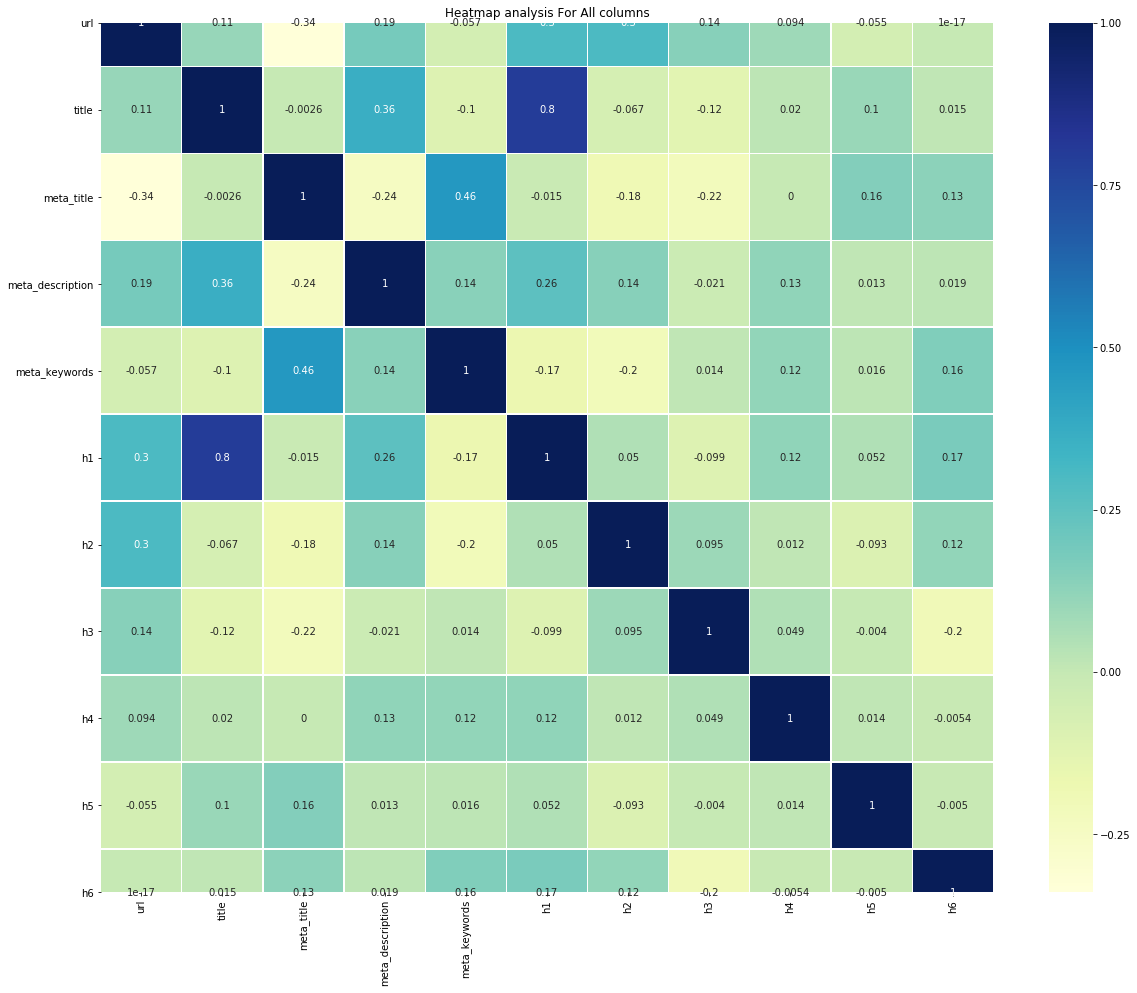

In [115]:
# Generate the Correlation matrix 
corr = In_Page_stats[['url','title','meta_title','meta_description','meta_keywords','h1','h2','h3','h4','h5','h6']].corr()

# Ploting using seaborn library
sns.heatmap(corr, annot=True, cmap="YlGnBu", linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,16)
plt.title("Heatmap analysis For All columns")
plt.show()

# Chi2-Square Test of Independence for Categorical Variables by considering each Feature/Predictor as target variable with rest of the columns

In [116]:
# Chi2 square test of independence for checking relation between Categorical variables and target varoable
# Lets save all categorical column names
col_names = ['title','meta_title','meta_description','meta_keywords','h1','h2','h3','h4','h5','h6']

print("<------Considering URl as Target Variable W.R.T all Variables-------->")
print("\n*******************************")
print("Chi2-Square Test of Independence")
print("\n*******************************")

# loop for chi2 square test of independence
for i in col_names:
    print(i)
    # here Chi2-Square test compares two variables in contigency table
    # considering url as target variable
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(In_Page_Opt_raw['url'],In_Page_Opt_raw[i]))
    print(p)
    print("-----------------------------") 

# Here Chi2 - is the observed/actual value
# Here P -  is the pearson correlation value i.e: (p<0.05)
# Here DOF( Degrees of Freedom) = (no. of rows-1) - (no. of columns-1)
# Here EX - is the expected value
# Here Conclusion is that if the P-Value is less than (p<0.05) we reject Null Hypothesis saying that 2 variables are 
# Independent of each other, else we accept alternate hypothesis saying that these 2 variables are not independent.
# which means that there is some dependency between the two variables.


<------Considering URl as Target Variable W.R.T all Variables-------->

*******************************
Chi2-Square Test of Independence

*******************************
title
0.23785667009285985
-----------------------------
meta_title
0.39657492219790025
-----------------------------
meta_description
0.2599752832672207
-----------------------------
meta_keywords
0.30606001061321275
-----------------------------
h1
0.24352169496261805
-----------------------------
h2
0.2847854309162025
-----------------------------
h3
0.26889646126330996
-----------------------------
h4
0.28589905488208134
-----------------------------
h5
0.37239195617466353
-----------------------------
h6
0.40595159964329725
-----------------------------


In [117]:
# Chi2 square test of independence for checking relation between Categorical variables and target varoable
# Lets save all categorical column names
col_names = ['url','meta_title','meta_description','meta_keywords','h1','h2','h3','h4','h5','h6']

print("<------Considering TITLE as Target Variable W.R.T all Variables-------->")
print("\n*******************************")
print("Chi2-Square Test of Independence")
print("\n*******************************")

# loop for chi2 square test of independence
for i in col_names:
    print(i)
    # here Chi2-Square test compares two variables in contigency table
    # considering title as target variable
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(In_Page_Opt_raw['title'], In_Page_Opt_raw[i]))
    print(p)
    print("-----------------------------") 

# Here Chi2 - is the observed/actual value
# Here P -  is the pearson correlation value i.e: (p<0.05)
# Here DOF( Degrees of Freedom) = (no. of rows-1) - (no. of columns-1)
# Here EX - is the expected value
# Here Conclusion is that if the P-Value is less than (p<0.05) we reject Null Hypothesis saying that 2 variables are 
# Independent of each other, else we accept alternate hypothesis saying that these 2 variables are not independent.
# which means that there is some dependency between the two variables.

<------Considering TITLE as Target Variable W.R.T all Variables-------->

*******************************
Chi2-Square Test of Independence

*******************************
url
0.23785667009285985
-----------------------------
meta_title
0.39657492219790086
-----------------------------
meta_description
0.2599752832672207
-----------------------------
meta_keywords
0.30606001061321275
-----------------------------
h1
0.24352169496261805
-----------------------------
h2
0.2847854309162034
-----------------------------
h3
0.26889646126330996
-----------------------------
h4
0.28589905488208306
-----------------------------
h5
0.3723919561746626
-----------------------------
h6
0.40595159964329725
-----------------------------


In [118]:
# Chi2 square test of independence for checking relation between Categorical variables and target varoable
# Lets save all categorical column names
col_names = ['url','title','meta_description','meta_keywords','h1','h2','h3','h4','h5','h6']

print("<------Considering META-TITLE as Target Variable W.R.T all Variables-------->")
print("\n*******************************")
print("Chi2-Square Test of Independence")
print("\n*******************************")

# loop for chi2 square test of independence
for i in col_names:
    print(i)
    # here Chi2-Square test compares two variables in contigency table
    # considering meta_title as target variable
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(In_Page_Opt_raw['meta_title'],In_Page_Opt_raw[i]))
    print(p)
    print("-----------------------------") 

# Here Chi2 - is the observed/actual value
# Here P -  is the pearson correlation value i.e: (p<0.05)
# Here DOF( Degrees of Freedom) = (no. of rows-1) - (no. of columns-1)
# Here EX - is the expected value
# Here Conclusion is that if the P-Value is less than (p<0.05) we reject Null Hypothesis saying that 2 variables are 
# Independent of each other, else we accept alternate hypothesis saying that these 2 variables are not independent.
# which means that there is some dependency between the two variables.

<------Considering META-TITLE as Target Variable W.R.T all Variables-------->

*******************************
Chi2-Square Test of Independence

*******************************
url
0.39657492219790086
-----------------------------
title
0.3965749221979021
-----------------------------
meta_description
0.04232917611164861
-----------------------------
meta_keywords
1.1685036882561656e-07
-----------------------------
h1
0.23349082351103628
-----------------------------
h2
0.9968555493275278
-----------------------------
h3
0.9806970153579364
-----------------------------
h4
0.8241044145645859
-----------------------------
h5
0.05833526104476046
-----------------------------
h6
6.712078243331918e-05
-----------------------------


In [119]:
# Chi2 square test of independence for checking relation between Categorical variables and target varoable
# Lets save all categorical column names
col_names = ['url','title','meta_title','meta_keywords','h1','h2','h3','h4','h5','h6']

print("<------Considering META-DESCRIPTION as Target Variable W.R.T all Variables-------->")
print("\n*******************************")
print("Chi2-Square Test of Independence")
print("\n*******************************")

# loop for chi2 square test of independence
for i in col_names:
    print(i)
    # here Chi2-Square test compares two variables in contigency table
    # considering meta_description as target variable
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(In_Page_Opt_raw['meta_description'],In_Page_Opt_raw[i]))
    print(p)
    print("-----------------------------") 

# Here Chi2 - is the observed/actual value
# Here P -  is the pearson correlation value i.e: (p<0.05)
# Here DOF( Degrees of Freedom) = (no. of rows-1) - (no. of columns-1)
# Here EX - is the expected value
# Here Conclusion is that if the P-Value is less than (p<0.05) we reject Null Hypothesis saying that 2 variables are 
# Independent of each other, else we accept alternate hypothesis saying that these 2 variables are not independent.
# which means that there is some dependency between the two variables.

<------Considering META-DESCRIPTION as Target Variable W.R.T all Variables-------->

*******************************
Chi2-Square Test of Independence

*******************************
url
0.2599752832672207
-----------------------------
title
0.2599752832672207
-----------------------------
meta_title
0.042329176111648964
-----------------------------
meta_keywords
0.0013798263182932965
-----------------------------
h1
0.12285780284724712
-----------------------------
h2
0.6139725327484205
-----------------------------
h3
0.2903894936257535
-----------------------------
h4
0.09113255922463293
-----------------------------
h5
0.21293311983151617
-----------------------------
h6
0.07663308976488487
-----------------------------


In [120]:
# Chi2 square test of independence for checking relation between Categorical variables and target varoable
# Lets save all categorical column names
col_names = ['url','title','meta_title','meta_description','h1','h2','h3','h4','h5','h6']

print("<------Considering META-KEYWORDS as Target Variable W.R.T all Variables-------->")
print("\n*******************************")
print("Chi2-Square Test of Independence")
print("\n*******************************")

# loop for chi2 square test of independence
for i in col_names:
    print(i)
    # here Chi2-Square test compares two variables in contigency table
    # considering meta_keywords as target variable
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(In_Page_Opt_raw['meta_keywords'],In_Page_Opt_raw[i]))
    print(p)
    print("-----------------------------") 

# Here Chi2 - is the observed/actual value
# Here P -  is the pearson correlation value i.e: (p<0.05)
# Here DOF( Degrees of Freedom) = (no. of rows-1) - (no. of columns-1)
# Here EX - is the expected value
# Here Conclusion is that if the P-Value is less than (p<0.05) we reject Null Hypothesis saying that 2 variables are 
# Independent of each other, else we accept alternate hypothesis saying that these 2 variables are not independent.
# which means that there is some dependency between the two variables.

<------Considering META-KEYWORDS as Target Variable W.R.T all Variables-------->

*******************************
Chi2-Square Test of Independence

*******************************
url
0.30606001061321275
-----------------------------
title
0.30606001061321275
-----------------------------
meta_title
1.1685036882561322e-07
-----------------------------
meta_description
0.0013798263182932965
-----------------------------
h1
0.1757181810141853
-----------------------------
h2
0.9088235484807994
-----------------------------
h3
0.6872566390362944
-----------------------------
h4
0.011614514192485983
-----------------------------
h5
0.0025796667762910007
-----------------------------
h6
3.5186861639320337e-06
-----------------------------


In [121]:
# Chi2 square test of independence for checking relation between Categorical variables and target varoable
# Lets save all categorical column names
col_names = ['url','title','meta_title','meta_description','meta_keywords','h2','h3','h4','h5','h6']

print("<------Considering H1 as Target Variable W.R.T all Variables-------->")
print("\n*******************************")
print("Chi2-Square Test of Independence")
print("\n*******************************")

# loop for chi2 square test of independence
for i in col_names:
    print(i)
    # here Chi2-Square test compares two variables in contigency table
    # considering h1 as target variable
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(In_Page_Opt_raw['h1'],In_Page_Opt_raw[i]))
    print(p)
    print("-----------------------------") 

# Here Chi2 - is the observed/actual value
# Here P -  is the pearson correlation value i.e: (p<0.05)
# Here DOF( Degrees of Freedom) = (no. of rows-1) - (no. of columns-1)
# Here EX - is the expected value
# Here Conclusion is that if the P-Value is less than (p<0.05) we reject Null Hypothesis saying that 2 variables are 
# Independent of each other, else we accept alternate hypothesis saying that these 2 variables are not independent.
# which means that there is some dependency between the two variables.

<------Considering H1 as Target Variable W.R.T all Variables-------->

*******************************
Chi2-Square Test of Independence

*******************************
url
0.2435216949626194
-----------------------------
title
0.2435216949626194
-----------------------------
meta_title
0.23349082351103628
-----------------------------
meta_description
0.12285780284724712
-----------------------------
meta_keywords
0.1757181810141853
-----------------------------
h2
0.37327157983442016
-----------------------------
h3
0.28189904144362854
-----------------------------
h4
0.11045355943954763
-----------------------------
h5
0.17357663980448004
-----------------------------
h6
0.2606904122376917
-----------------------------


In [122]:
# Chi2 square test of independence for checking relation between Categorical variables and target varoable
# Lets save all categorical column names
col_names = ['url','title','meta_title','meta_description','meta_keywords','h1','h3','h4','h5','h6']

print("<------Considering H2 as Target Variable W.R.T all Variables-------->")
print("\n*******************************")
print("Chi2-Square Test of Independence")
print("\n*******************************")

# loop for chi2 square test of independence
for i in col_names:
    print(i)
    # here Chi2-Square test compares two variables in contigency table
    # considering h2 as target variable
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(In_Page_Opt_raw['h2'],In_Page_Opt_raw[i]))
    print(p)
    print("-----------------------------") 

# Here Chi2 - is the observed/actual value
# Here P -  is the pearson correlation value i.e: (p<0.05)
# Here DOF( Degrees of Freedom) = (no. of rows-1) - (no. of columns-1)
# Here EX - is the expected value
# Here Conclusion is that if the P-Value is less than (p<0.05) we reject Null Hypothesis saying that 2 variables are 
# Independent of each other, else we accept alternate hypothesis saying that these 2 variables are not independent.
# which means that there is some dependency between the two variables.

<------Considering H2 as Target Variable W.R.T all Variables-------->

*******************************
Chi2-Square Test of Independence

*******************************
url
0.2847854309162025
-----------------------------
title
0.2847854309162034
-----------------------------
meta_title
0.9968555493275278
-----------------------------
meta_description
0.6139725327484205
-----------------------------
meta_keywords
0.9088235484807994
-----------------------------
h1
0.37327157983442016
-----------------------------
h3
0.00041772374688385354
-----------------------------
h4
0.2987643299722424
-----------------------------
h5
0.8803666061154246
-----------------------------
h6
0.7377852814080877
-----------------------------


In [123]:
# Chi2 square test of independence for checking relation between Categorical variables and target varoable
# Lets save all categorical column names
col_names = ['url','title','meta_title','meta_description','meta_keywords','h1','h2','h4','h5','h6']

print("<------Considering H3 as Target Variable W.R.T all Variables-------->")
print("\n*******************************")
print("Chi2-Square Test of Independence")
print("\n*******************************")

# loop for chi2 square test of independence
for i in col_names:
    print(i)
    # here Chi2-Square test compares two variables in contigency table
    # considering h3 as target variable
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(In_Page_Opt_raw['h3'],In_Page_Opt_raw[i]))
    print(p)
    print("-----------------------------") 

# Here Chi2 - is the observed/actual value
# Here P -  is the pearson correlation value i.e: (p<0.05)
# Here DOF( Degrees of Freedom) = (no. of rows-1) - (no. of columns-1)
# Here EX - is the expected value
# Here Conclusion is that if the P-Value is less than (p<0.05) we reject Null Hypothesis saying that 2 variables are 
# Independent of each other, else we accept alternate hypothesis saying that these 2 variables are not independent.
# which means that there is some dependency between the two variables.

<------Considering H3 as Target Variable W.R.T all Variables-------->

*******************************
Chi2-Square Test of Independence

*******************************
url
0.26889646126330996
-----------------------------
title
0.26889646126330996
-----------------------------
meta_title
0.9806970153579364
-----------------------------
meta_description
0.2903894936257554
-----------------------------
meta_keywords
0.6872566390362932
-----------------------------
h1
0.28189904144362854
-----------------------------
h2
0.00041772374688385354
-----------------------------
h4
0.0025704873140861718
-----------------------------
h5
0.953598879416003
-----------------------------
h6
0.5860613554279624
-----------------------------


In [124]:
# Chi2 square test of independence for checking relation between Categorical variables and target varoable
# Lets save all categorical column names
col_names = ['url','title','meta_title','meta_description','meta_keywords','h1','h2','h3','h5','h6']

print("<------Considering H4 as Target Variable W.R.T all Variables-------->")
print("\n*******************************")
print("Chi2-Square Test of Independence")
print("\n*******************************")

# loop for chi2 square test of independence
for i in col_names:
    print(i)
    # here Chi2-Square test compares two variables in contigency table
    # considering h4 as target variable
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(In_Page_Opt_raw['h4'],In_Page_Opt_raw[i]))
    print(p)
    print("-----------------------------") 

# Here Chi2 - is the observed/actual value
# Here P -  is the pearson correlation value i.e: (p<0.05)
# Here DOF( Degrees of Freedom) = (no. of rows-1) - (no. of columns-1)
# Here EX - is the expected value
# Here Conclusion is that if the P-Value is less than (p<0.05) we reject Null Hypothesis saying that 2 variables are 
# Independent of each other, else we accept alternate hypothesis saying that these 2 variables are not independent.
# which means that there is some dependency between the two variables.

<------Considering H4 as Target Variable W.R.T all Variables-------->

*******************************
Chi2-Square Test of Independence

*******************************
url
0.2858990548820821
-----------------------------
title
0.28589905488208306
-----------------------------
meta_title
0.8241044145645862
-----------------------------
meta_description
0.09113255922463293
-----------------------------
meta_keywords
0.011614514192485942
-----------------------------
h1
0.11045355943954763
-----------------------------
h2
0.2987643299722424
-----------------------------
h3
0.002570487314086214
-----------------------------
h5
0.03431415963869744
-----------------------------
h6
0.20803032067199345
-----------------------------


In [125]:
# Chi2 square test of independence for checking relation between Categorical variables and target varoable
# Lets save all categorical column names
col_names = ['url','title','meta_title','meta_description','meta_keywords','h1','h2','h3','h4','h6']

print("<------Considering H5 as Target Variable W.R.T all Variables-------->")
print("\n*******************************")
print("Chi2-Square Test of Independence")
print("\n*******************************")

# loop for chi2 square test of independence
for i in col_names:
    print(i)
    # here Chi2-Square test compares two variables in contigency table
    # considering h5 as target variable
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(In_Page_Opt_raw['h5'],In_Page_Opt_raw[i]))
    print(p)
    print("-----------------------------") 

# Here Chi2 - is the observed/actual value
# Here P -  is the pearson correlation value i.e: (p<0.05)
# Here DOF( Degrees of Freedom) = (no. of rows-1) - (no. of columns-1)
# Here EX - is the expected value
# Here Conclusion is that if the P-Value is less than (p<0.05) we reject Null Hypothesis saying that 2 variables are 
# Independent of each other, else we accept alternate hypothesis saying that these 2 variables are not independent.
# which means that there is some dependency between the two variables.

<------Considering H5 as Target Variable W.R.T all Variables-------->

*******************************
Chi2-Square Test of Independence

*******************************
url
0.3723919561746626
-----------------------------
title
0.3723919561746617
-----------------------------
meta_title
0.05833526104476068
-----------------------------
meta_description
0.21293311983151617
-----------------------------
meta_keywords
0.0025796667762910765
-----------------------------
h1
0.17357663980448065
-----------------------------
h2
0.8803666061154244
-----------------------------
h3
0.9535988794160029
-----------------------------
h4
0.034314159638697356
-----------------------------
h6
0.0066591450404438575
-----------------------------


In [126]:
# Chi2 square test of independence for checking relation between Categorical variables and target varoable
# Lets save all categorical column names
col_names = ['url','title','meta_title','meta_description','meta_keywords','h1','h2','h3','h4','h5']

print("<------Considering H6 as Target Variable W.R.T all Variables-------->")
print("\n*******************************")
print("Chi2-Square Test of Independence")
print("\n*******************************")

# loop for chi2 square test of independence
for i in col_names:
    print(i)
    # here Chi2-Square test compares two variables in contigency table
    # considering h6 as target variable
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(In_Page_Opt_raw['h6'],In_Page_Opt_raw[i]))
    print(p)
    print("-----------------------------") 

# Here Chi2 - is the observed/actual value
# Here P -  is the pearson correlation value i.e: (p<0.05)
# Here DOF( Degrees of Freedom) = (no. of rows-1) - (no. of columns-1)
# Here EX - is the expected value
# Here Conclusion is that if the P-Value is less than (p<0.05) we reject Null Hypothesis saying that 2 variables are 
# Independent of each other, else we accept alternate hypothesis saying that these 2 variables are not independent.
# which means that there is some dependency between the two variables.

<------Considering H6 as Target Variable W.R.T all Variables-------->

*******************************
Chi2-Square Test of Independence

*******************************
url
0.40595159964329725
-----------------------------
title
0.4059515996432968
-----------------------------
meta_title
6.712078243331941e-05
-----------------------------
meta_description
0.07663308976488523
-----------------------------
meta_keywords
3.5186861639320337e-06
-----------------------------
h1
0.26069041223769257
-----------------------------
h2
0.7377852814080874
-----------------------------
h3
0.5860613554279646
-----------------------------
h4
0.20803032067199276
-----------------------------
h5
0.006659145040443886
-----------------------------


# ANOVA (Analysis of Variance) Test by considering each Feature/Predictor as target variable with rest of the columns

In [127]:
# Lets See the Analysis of Variance, considering URL as target variable
aov_test_count = ols('url~title+meta_title+meta_description+meta_keywords+h1+h2+h3+h4+h5+h6', data=In_Page_stats).fit()
anova_table_url = sm.stats.anova_lm(aov_test_count, typ=2)
anova_table_url

sum_sq    df         F    PR(>F)
title              182.050917   1.0  1.512198  0.228688
meta_title         495.622659   1.0  4.116868  0.051726
meta_description     0.686266   1.0  0.005700  0.940334
meta_keywords      219.182537   1.0  1.820630  0.187679
h1                 638.600747   1.0  5.304509  0.028636
h2                 272.001313   1.0  2.259367  0.143621
h3                   3.027627   1.0  0.025149  0.875096
h4                   0.591940   1.0  0.004917  0.944579
h5                   4.105379   1.0  0.034101  0.854777
h6                  61.700009   1.0  0.512508  0.479780
Residual          3491.260228  29.0       NaN       NaN

In [128]:
# Lets See the Analysis of Variance, considering title as target variable
aov_test_count = ols('title~url+meta_title+meta_description+meta_keywords+h1+h2+h3+h4+h5+h6', data=In_Page_stats).fit()
anova_table_title = sm.stats.anova_lm(aov_test_count, typ=2)
anova_table_title

sum_sq    df          F        PR(>F)
url                 77.102949   1.0   1.512198  2.286876e-01
meta_title           0.363921   1.0   0.007137  9.332525e-01
meta_description   148.461359   1.0   2.911730  9.862626e-02
meta_keywords        1.366570   1.0   0.026802  8.710923e-01
h1                2540.886568   1.0  49.833677  9.145736e-08
h2                  18.064432   1.0   0.354293  5.563100e-01
h3                   6.456605   1.0   0.126632  7.245261e-01
h4                  44.032586   1.0   0.863598  3.604049e-01
h5                  11.331287   1.0   0.222237  6.408679e-01
h6                  81.829200   1.0   1.604893  2.152915e-01
Residual          1478.632811  29.0        NaN           NaN

In [129]:
# Lets See the Analysis of Variance , considering meta-title as target variable
aov_test_count = ols('meta_title~title+url+meta_description+meta_keywords+h1+h2+h3+h4+h5+h6', data=In_Page_stats).fit()
anova_table_meta_title = sm.stats.anova_lm(aov_test_count, typ=2)
anova_table_meta_title

sum_sq    df          F    PR(>F)
title              0.003522   1.0   0.007137  0.933252
url                2.031742   1.0   4.116868  0.051726
meta_description   2.343902   1.0   4.749391  0.037576
meta_keywords      7.041764   1.0  14.268552  0.000730
h1                 0.478363   1.0   0.969294  0.333000
h2                 0.191981   1.0   0.389006  0.537698
h3                 0.799607   1.0   1.620225  0.213171
h4                 0.010250   1.0   0.020769  0.886407
h5                 0.463845   1.0   0.939877  0.340326
h6                 0.041017   1.0   0.083111  0.775176
Residual          14.311975  29.0        NaN       NaN

In [130]:
# Lets See the Analysis of Variance , considering meta-description as target variable
aov_test_count = ols('meta_description~title+url+meta_title+meta_keywords+h1+h2+h3+h4+h5+h6', data=In_Page_stats).fit()
anova_table_meta_description = sm.stats.anova_lm(aov_test_count, typ=2)
anova_table_meta_description

sum_sq    df         F    PR(>F)
title           245.819060   1.0  2.911730  0.098626
url               0.481252   1.0  0.005700  0.940334
meta_title      400.961224   1.0  4.749391  0.037576
meta_keywords   390.268077   1.0  4.622730  0.040023
h1                5.610287   1.0  0.066454  0.798392
h2              129.095552   1.0  1.529138  0.226163
h3               28.429313   1.0  0.336746  0.566196
h4               22.390240   1.0  0.265213  0.610465
h5                6.901389   1.0  0.081747  0.776976
h6                2.281653   1.0  0.027026  0.870560
Residual       2448.287763  29.0       NaN       NaN

In [131]:
# Lets See the Analysis of Variance , considering meta-keywords as target variable
aov_test_count = ols('meta_keywords~title+url+meta_title+meta_description+h1+h2+h3+h4+h5+h6', data=In_Page_stats).fit()
anova_table_meta_keywords = sm.stats.anova_lm(aov_test_count, typ=2)
anova_table_meta_keywords

sum_sq    df          F    PR(>F)
title               0.705450   1.0   0.026802  0.871092
url                47.920213   1.0   1.820630  0.187679
meta_title        375.557923   1.0  14.268552  0.000730
meta_description  121.673381   1.0   4.622730  0.040023
h1                 49.550043   1.0   1.882552  0.180566
h2                 66.270121   1.0   2.517797  0.123413
h3                 25.341148   1.0   0.962785  0.334602
h4                 12.071069   1.0   0.458615  0.503639
h5                  7.595093   1.0   0.288560  0.595243
h6                 45.772036   1.0   1.739015  0.197584
Residual          763.299556  29.0        NaN       NaN

In [132]:
# Lets See the Analysis of Variance , considering h1 as target variable
aov_test_count = ols('h1~title+url+meta_title+meta_description+meta_keywords+h2+h3+h4+h5+h6', data=In_Page_stats).fit()
anova_table_h1 = sm.stats.anova_lm(aov_test_count, typ=2)
anova_table_h1

sum_sq    df          F        PR(>F)
title             2122.540545   1.0  49.833677  9.145736e-08
url                225.932266   1.0   5.304509  2.863592e-02
meta_title          41.284653   1.0   0.969294  3.329995e-01
meta_description     2.830438   1.0   0.066454  7.983922e-01
meta_keywords       80.182591   1.0   1.882552  1.805655e-01
h2                   0.248637   1.0   0.005838  9.396223e-01
h3                   2.045964   1.0   0.048036  8.280524e-01
h4                  53.859130   1.0   1.264522  2.700188e-01
h5                   4.844378   1.0   0.113738  7.383570e-01
h6                 138.878787   1.0   3.260640  8.135241e-02
Residual          1235.182291  29.0        NaN           NaN

In [133]:
# Lets See the Analysis of Variance , considering h2 as target variable
aov_test_count = ols('h2~title+url+meta_title+meta_description+meta_keywords+h1+h3+h4+h5+h6', data=In_Page_stats).fit()
anova_table_h2 = sm.stats.anova_lm(aov_test_count, typ=2)
anova_table_h2

sum_sq    df         F    PR(>F)
title               21.685370   1.0  0.354293  0.556310
url                138.290270   1.0  2.259367  0.143621
meta_title          23.810087   1.0  0.389006  0.537698
meta_description    93.594788   1.0  1.529138  0.226163
meta_keywords      154.108147   1.0  2.517797  0.123413
h1                   0.357304   1.0  0.005838  0.939622
h3                  21.358845   1.0  0.348958  0.559280
h4                   0.016078   1.0  0.000263  0.987180
h5                  12.029267   1.0  0.196532  0.660824
h6                  60.881697   1.0  0.994677  0.326852
Residual          1775.018348  29.0       NaN       NaN

In [134]:
# Lets See the Analysis of Variance , considering h3 as target variable
aov_test_count = ols('h3~title+url+meta_title+meta_description+meta_keywords+h1+h2+h4+h5+h6', data=In_Page_stats).fit()
anova_table_h3 = sm.stats.anova_lm(aov_test_count, typ=2)
anova_table_h3

sum_sq    df         F    PR(>F)
title               12.190965   1.0  0.126632  0.724526
url                  2.421109   1.0  0.025149  0.875096
meta_title         155.980932   1.0  1.620225  0.213171
meta_description    32.418888   1.0  0.336746  0.566196
meta_keywords       92.688419   1.0  0.962785  0.334602
h1                   4.624462   1.0  0.048036  0.828052
h2                  33.594572   1.0  0.348958  0.559280
h4                   1.843282   1.0  0.019147  0.890903
h5                  10.922932   1.0  0.113460  0.738664
h6                 134.937093   1.0  1.401636  0.246064
Residual          2791.863666  29.0       NaN       NaN

In [135]:
# Lets See the Analysis of Variance , considering h4 as target variable
aov_test_count = ols('h4~title+url+meta_title+meta_description+meta_keywords+h1+h2+h3+h5+h6', data=In_Page_stats).fit()
anova_table_h4 = sm.stats.anova_lm(aov_test_count, typ=2)
anova_table_h4

sum_sq    df         F    PR(>F)
title               72.988275   1.0  0.863598  0.360405
url                  0.415561   1.0  0.004917  0.944579
meta_title           1.755321   1.0  0.020769  0.886407
meta_description    22.414834   1.0  0.265213  0.610465
meta_keywords       38.760554   1.0  0.458615  0.503639
h1                 106.872884   1.0  1.264522  0.270019
h2                   0.022201   1.0  0.000263  0.987180
h3                   1.618217   1.0  0.019147  0.890903
h5                   1.765899   1.0  0.020894  0.886068
h6                  15.788254   1.0  0.186807  0.668785
Residual          2450.977077  29.0       NaN       NaN

In [136]:
# Lets See the Analysis of Variance , considering h5 as target variable
aov_test_count = ols('h5~title+url+meta_title+meta_description+meta_keywords+h1+h2+h3+h4+h6', data=In_Page_stats).fit()
anova_table_h5 = sm.stats.anova_lm(aov_test_count, typ=2)
anova_table_h5

sum_sq    df         F    PR(>F)
title               0.873905   1.0  0.222237  0.640868
url                 0.134096   1.0  0.034101  0.854777
meta_title          3.695886   1.0  0.939877  0.340326
meta_description    0.321454   1.0  0.081747  0.776976
meta_keywords       1.134706   1.0  0.288560  0.595243
h1                  0.447252   1.0  0.113738  0.738357
h2                  0.772826   1.0  0.196532  0.660824
h3                  0.446160   1.0  0.113460  0.738664
h4                  0.082162   1.0  0.020894  0.886068
h6                  0.065457   1.0  0.016646  0.898233
Residual          114.036892  29.0       NaN       NaN

In [137]:
# Lets See the Analysis of Variance , considering h1 as target variable
aov_test_count = ols('h6~title+url+meta_title+meta_description+meta_keywords+h1+h2+h3+h4+h5', data=In_Page_stats).fit()
anova_table_h6 = sm.stats.anova_lm(aov_test_count, typ=2)
anova_table_h6

sum_sq    df         F    PR(>F)
title              0.584549   1.0  1.604893  0.215291
url                0.186671   1.0  0.512508  0.479780
meta_title         0.030271   1.0  0.083111  0.775176
meta_description   0.009844   1.0  0.027026  0.870560
meta_keywords      0.633400   1.0  1.739015  0.197584
h1                 1.187621   1.0  3.260640  0.081352
h2                 0.362290   1.0  0.994677  0.326852
h3                 0.510517   1.0  1.401636  0.246064
h4                 0.068041   1.0  0.186807  0.668785
h5                 0.006063   1.0  0.016646  0.898233
Residual          10.562654  29.0       NaN       NaN

# Checking Feature Importances For RAW Data

In [138]:
# Checking Features Importances
# Lets drop some of the columns
from sklearn.ensemble import ExtraTreesRegressor
regressor = ExtraTreesRegressor(n_estimators=300)
X = In_Page_stats
y = In_Page_stats
regressor.fit(X,y)
feat_imp = pd.DataFrame({'Features':In_Page_stats.columns,
                         'importance':regressor.feature_importances_})
feat_imp.sort_values(by = 'importance', ascending=False).reset_index(drop=True)

Features  importance
0                 h1    0.199707
1              title    0.171821
2                url    0.171604
3   meta_description    0.121341
4                 h3    0.100726
5                 h4    0.078338
6                 h2    0.073970
7      meta_keywords    0.043542
8                 h5    0.021211
9         meta_title    0.012062
10                h6    0.005678

# Regression Plot Analysis

In [139]:
#Scatter plot function
def diff_scattr(x,y):
    fig = plt.figure()
    fig = sns.lmplot(x,y, data=In_Page_stats,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.xlabel(x,fontsize= 14)
    plt.ylabel(y,fontsize= 14)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10)
    plt.title("{X} and {Y} Scatter Plot".format(X=x,Y=y),fontsize = 16)
    #fig.savefig("{X}_and_{Y}_Scatter_Plot..png".format(X=x,Y=y))
    plt.show()

<Figure size 432x288 with 0 Axes>

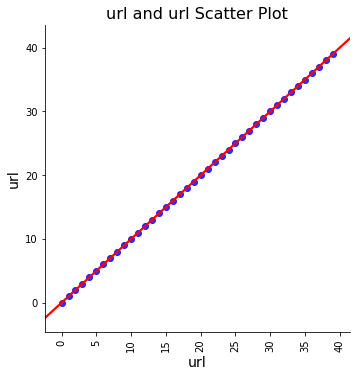

<Figure size 432x288 with 0 Axes>

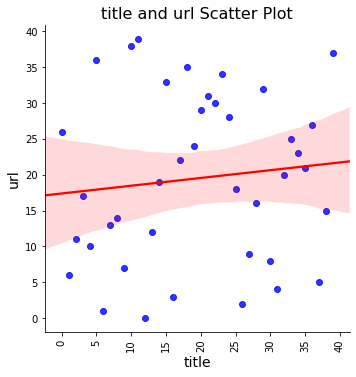

<Figure size 432x288 with 0 Axes>

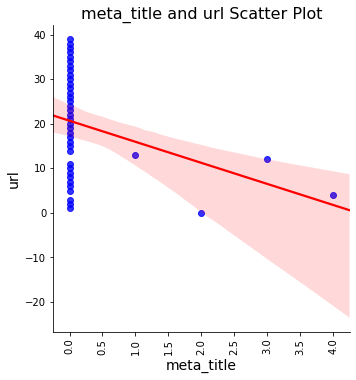

<Figure size 432x288 with 0 Axes>

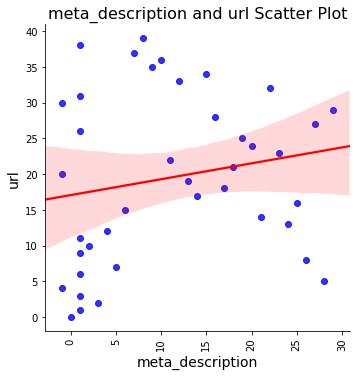

<Figure size 432x288 with 0 Axes>

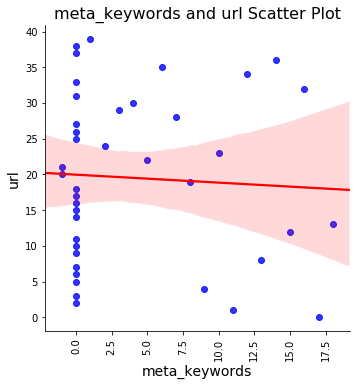

<Figure size 432x288 with 0 Axes>

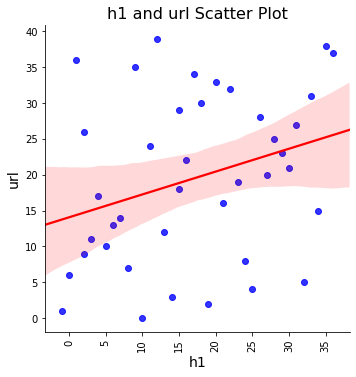

<Figure size 432x288 with 0 Axes>

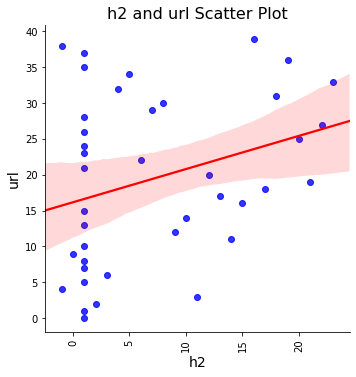

<Figure size 432x288 with 0 Axes>

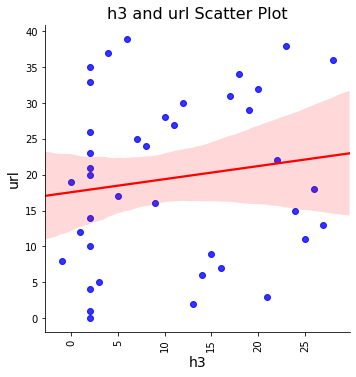

<Figure size 432x288 with 0 Axes>

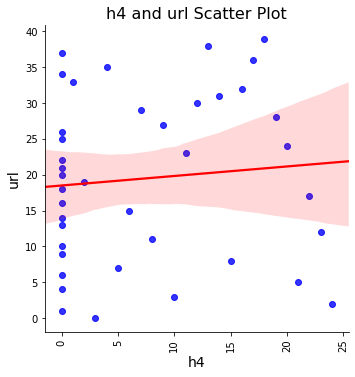

<Figure size 432x288 with 0 Axes>

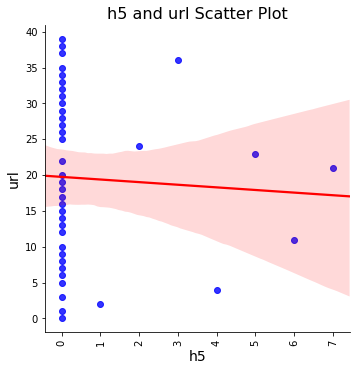

In [140]:
# Scatter Plot For Cheking the Variables correlation with a fitted regression line W.R.T 'URL'
for i in col_names:
    diff_scattr(x=i,y='url')

<Figure size 432x288 with 0 Axes>

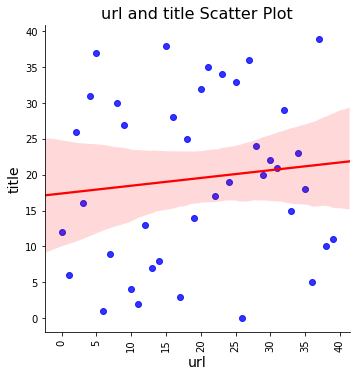

<Figure size 432x288 with 0 Axes>

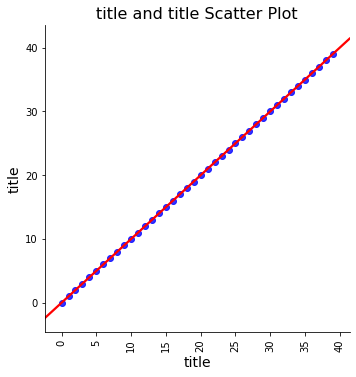

<Figure size 432x288 with 0 Axes>

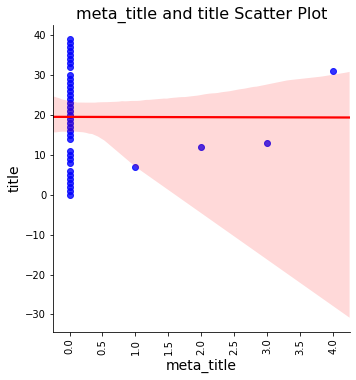

<Figure size 432x288 with 0 Axes>

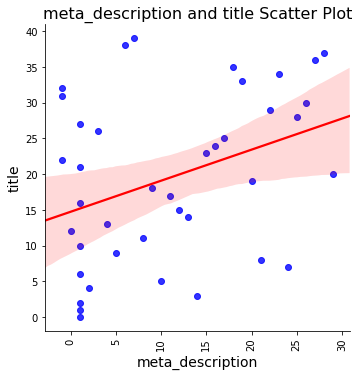

<Figure size 432x288 with 0 Axes>

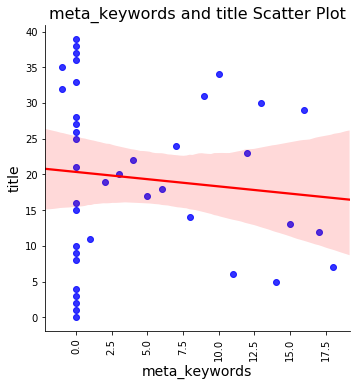

<Figure size 432x288 with 0 Axes>

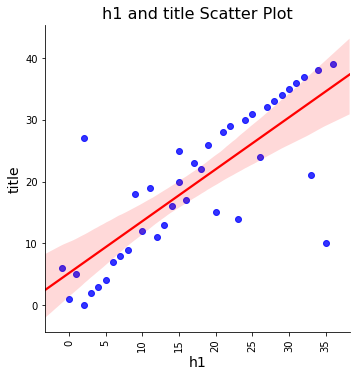

<Figure size 432x288 with 0 Axes>

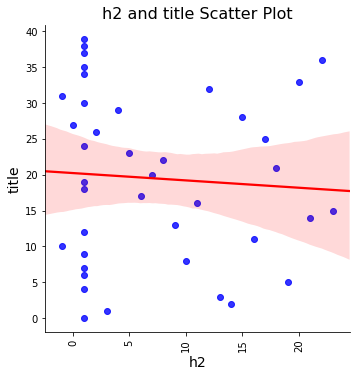

<Figure size 432x288 with 0 Axes>

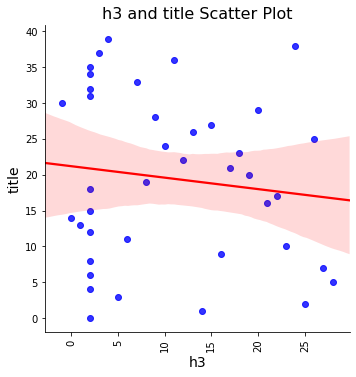

<Figure size 432x288 with 0 Axes>

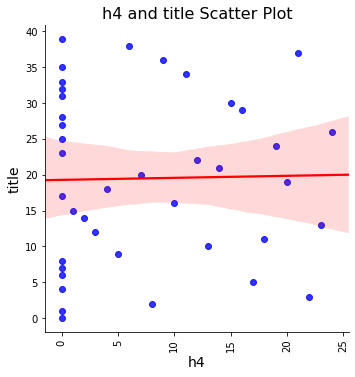

<Figure size 432x288 with 0 Axes>

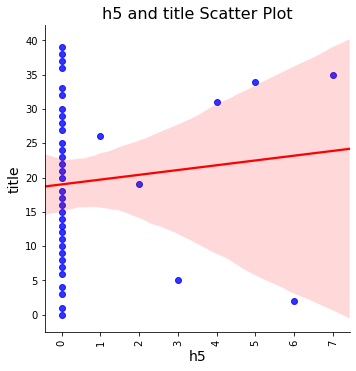

In [141]:
# Scatter Plot For Cheking the Variables correlation with a fitted regression line W.R.T 'title'
for i in col_names:
    diff_scattr(x=i,y='title')

<Figure size 432x288 with 0 Axes>

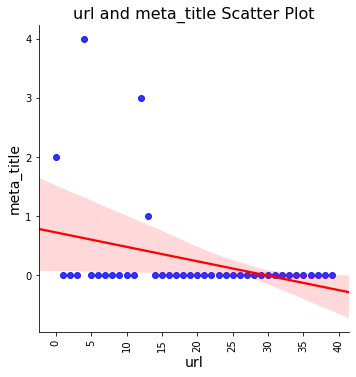

<Figure size 432x288 with 0 Axes>

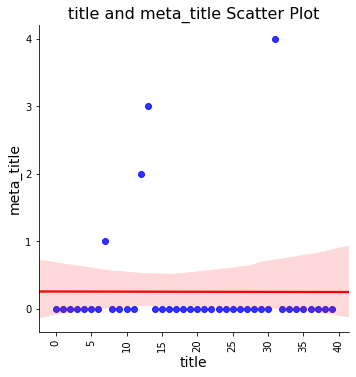

<Figure size 432x288 with 0 Axes>

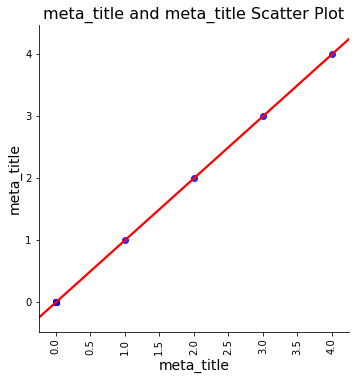

<Figure size 432x288 with 0 Axes>

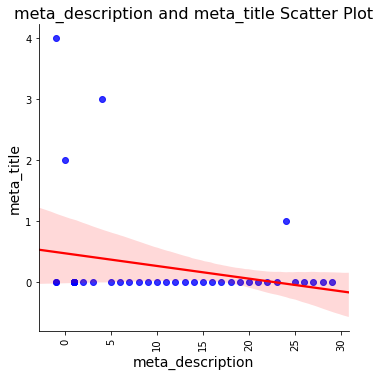

<Figure size 432x288 with 0 Axes>

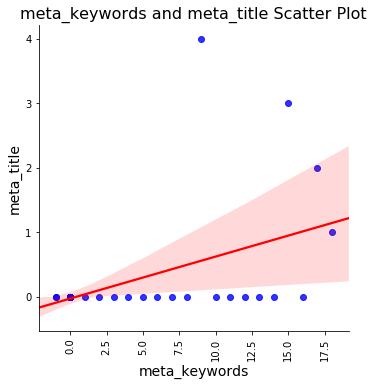

<Figure size 432x288 with 0 Axes>

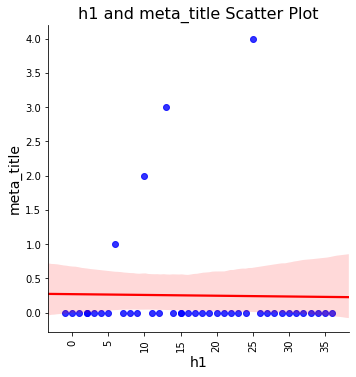

<Figure size 432x288 with 0 Axes>

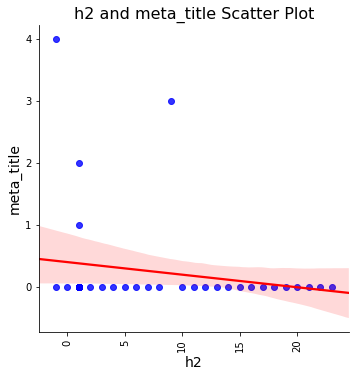

<Figure size 432x288 with 0 Axes>

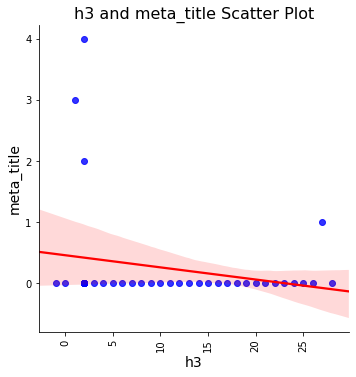

<Figure size 432x288 with 0 Axes>

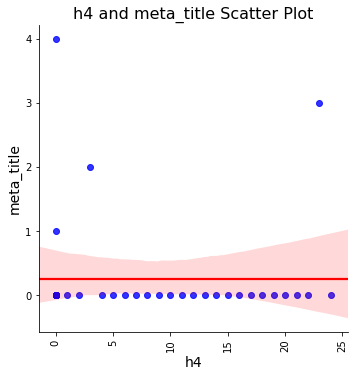

<Figure size 432x288 with 0 Axes>

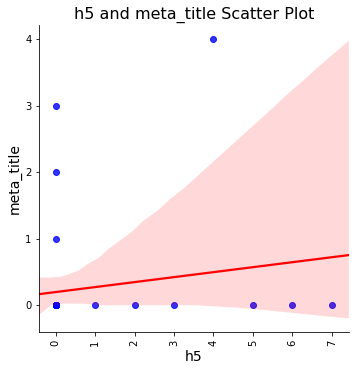

In [142]:
# Scatter Plot For Cheking the Variables correlation with a fitted regression line W.R.T 'meta-title' 
for i in col_names:
    diff_scattr(x=i,y='meta_title')

<Figure size 432x288 with 0 Axes>

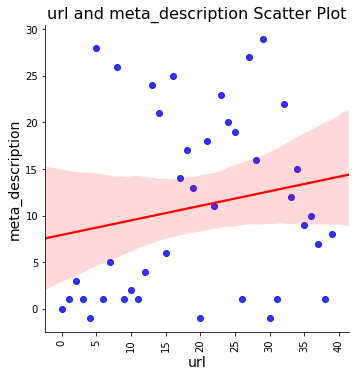

<Figure size 432x288 with 0 Axes>

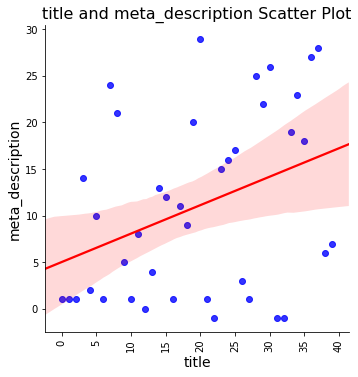

<Figure size 432x288 with 0 Axes>

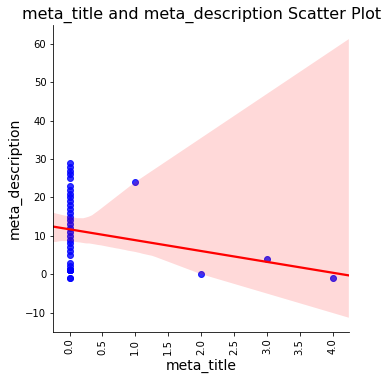

<Figure size 432x288 with 0 Axes>

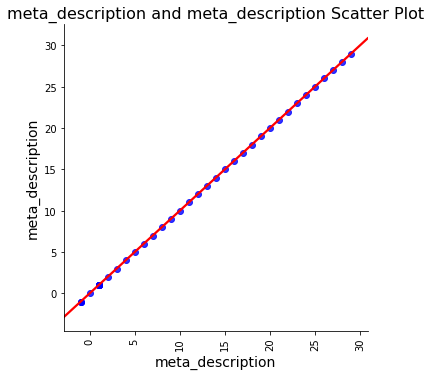

<Figure size 432x288 with 0 Axes>

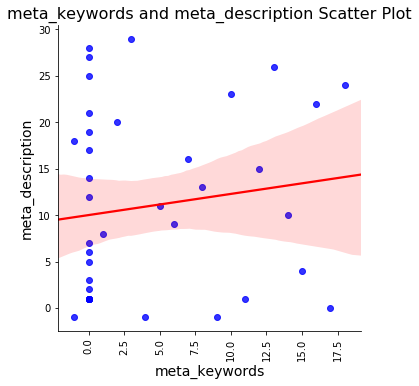

<Figure size 432x288 with 0 Axes>

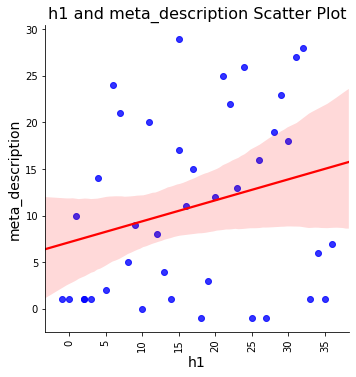

<Figure size 432x288 with 0 Axes>

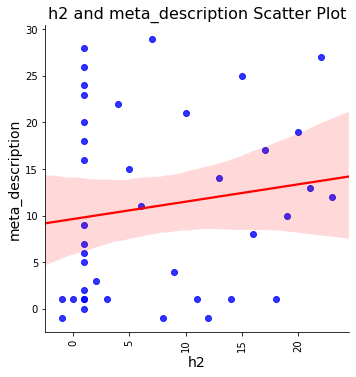

<Figure size 432x288 with 0 Axes>

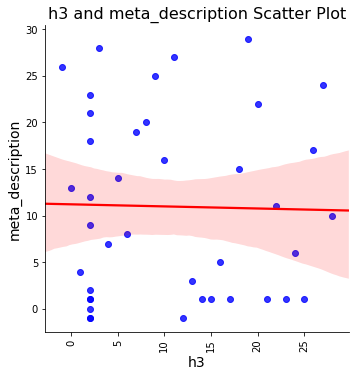

<Figure size 432x288 with 0 Axes>

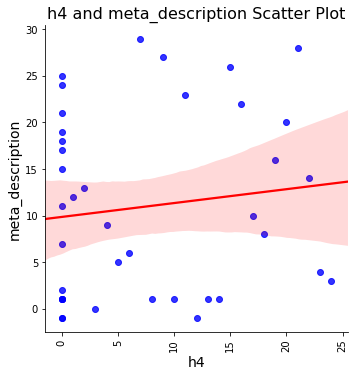

<Figure size 432x288 with 0 Axes>

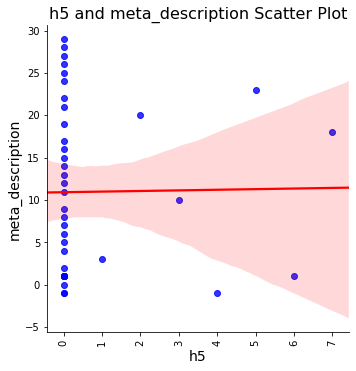

In [143]:
# Scatter Plot For Cheking the Variables correlation with a fitted regression line W.R.T 'meta-description' 
for i in col_names:
    diff_scattr(x=i,y='meta_description')

<Figure size 432x288 with 0 Axes>

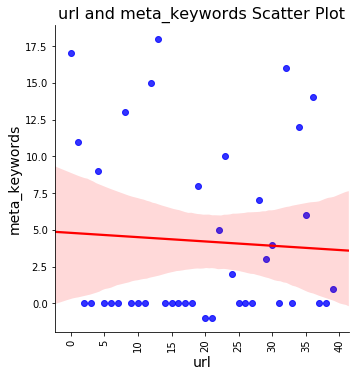

<Figure size 432x288 with 0 Axes>

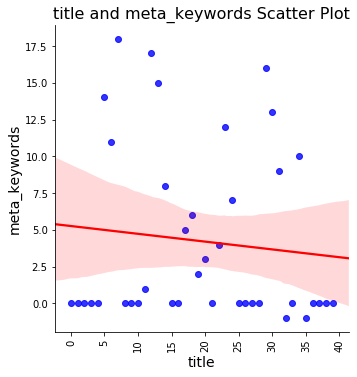

<Figure size 432x288 with 0 Axes>

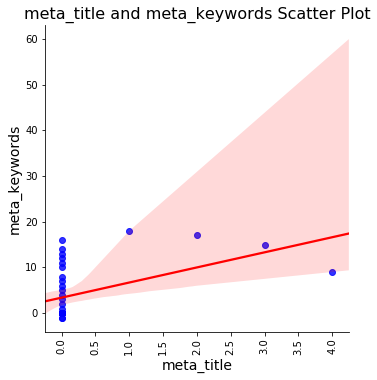

<Figure size 432x288 with 0 Axes>

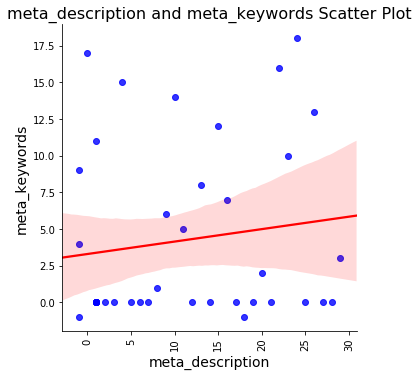

<Figure size 432x288 with 0 Axes>

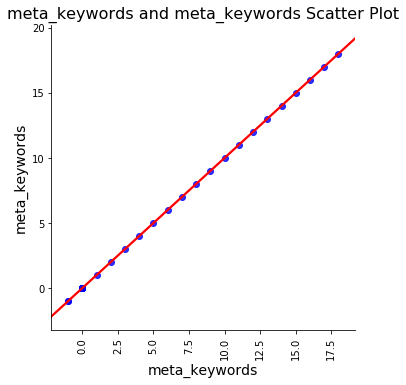

<Figure size 432x288 with 0 Axes>

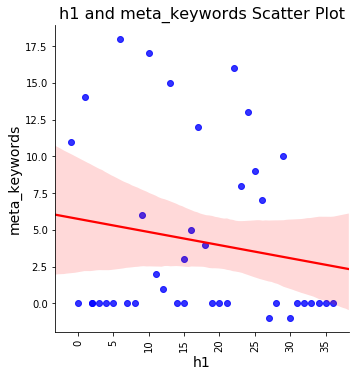

<Figure size 432x288 with 0 Axes>

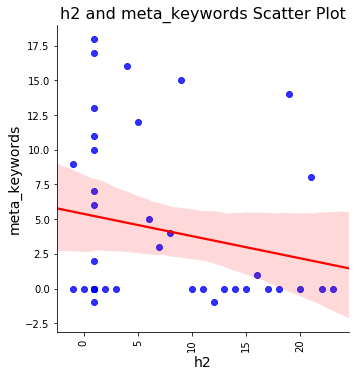

<Figure size 432x288 with 0 Axes>

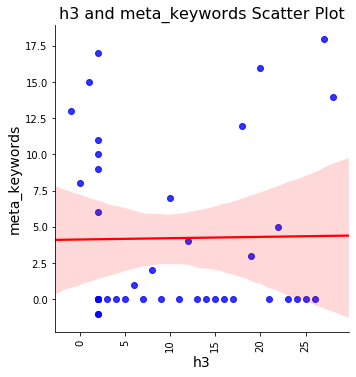

<Figure size 432x288 with 0 Axes>

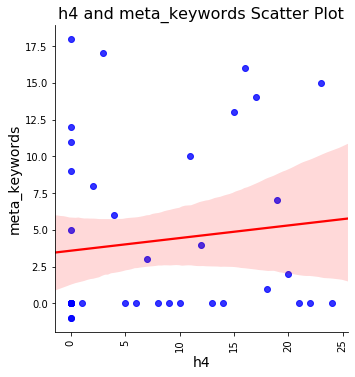

<Figure size 432x288 with 0 Axes>

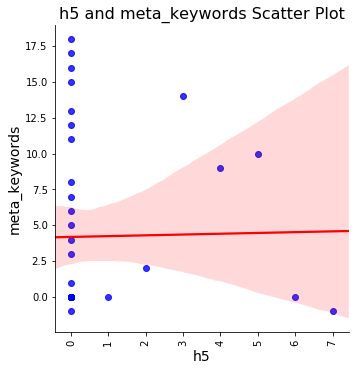

In [144]:
# Scatter Plot For Cheking the Variables correlation with a fitted regression line W.R.T 'meta-keywords' 
for i in col_names:
    diff_scattr(x=i,y='meta_keywords')

<Figure size 432x288 with 0 Axes>

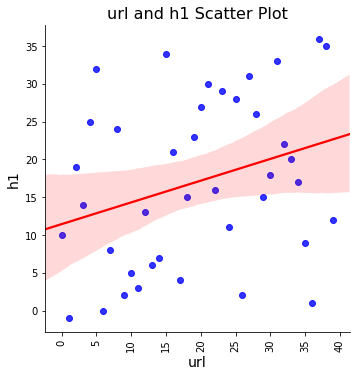

<Figure size 432x288 with 0 Axes>

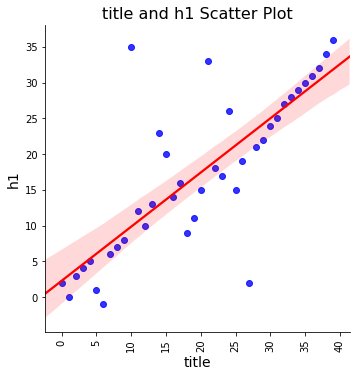

<Figure size 432x288 with 0 Axes>

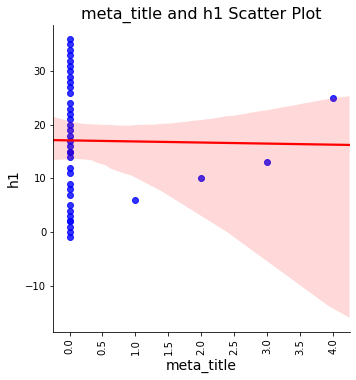

<Figure size 432x288 with 0 Axes>

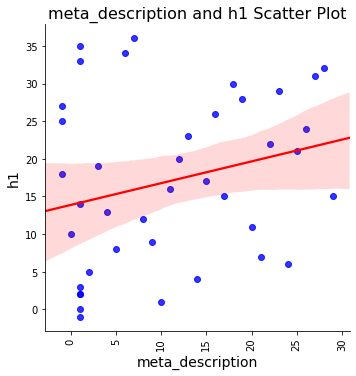

<Figure size 432x288 with 0 Axes>

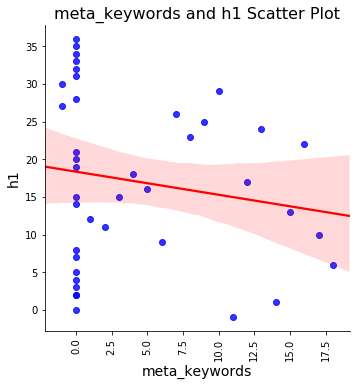

<Figure size 432x288 with 0 Axes>

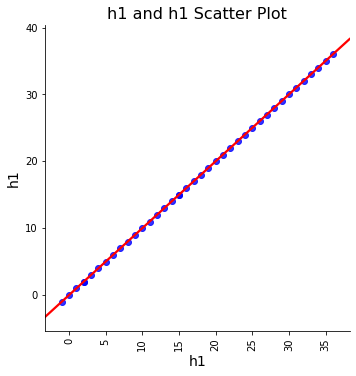

<Figure size 432x288 with 0 Axes>

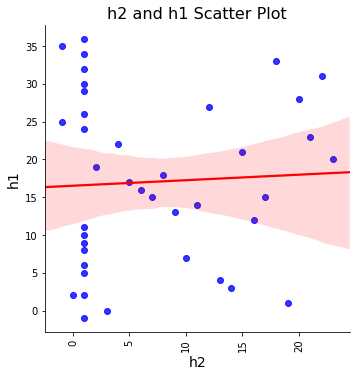

<Figure size 432x288 with 0 Axes>

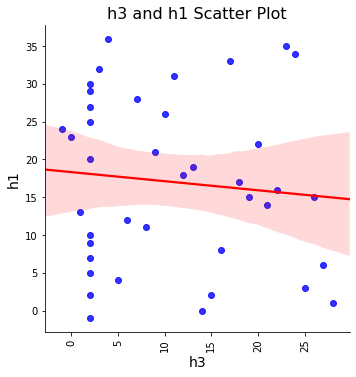

<Figure size 432x288 with 0 Axes>

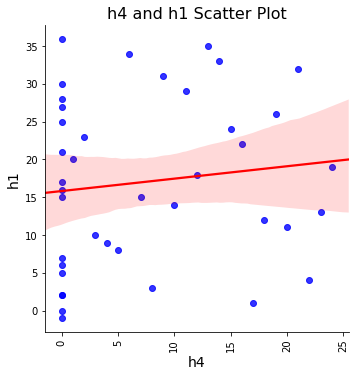

<Figure size 432x288 with 0 Axes>

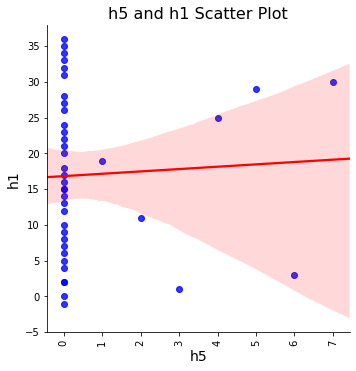

In [145]:
# Scatter Plot For Cheking the Variables correlation with a fitted regression line W.R.T 'H1' 
for i in col_names:
    diff_scattr(x=i,y='h1')

<Figure size 432x288 with 0 Axes>

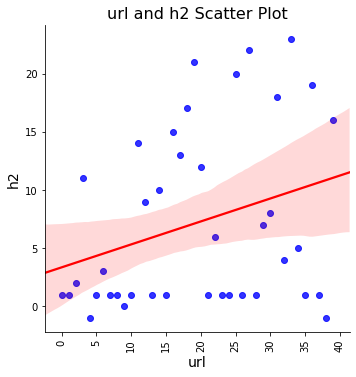

<Figure size 432x288 with 0 Axes>

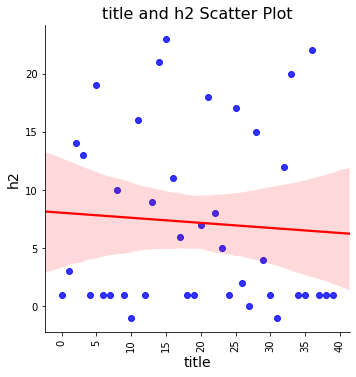

<Figure size 432x288 with 0 Axes>

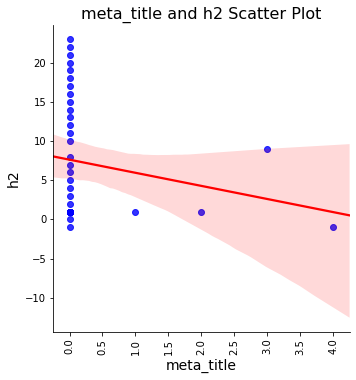

<Figure size 432x288 with 0 Axes>

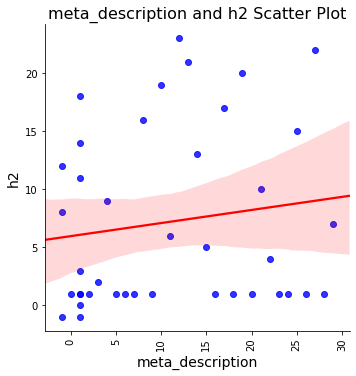

<Figure size 432x288 with 0 Axes>

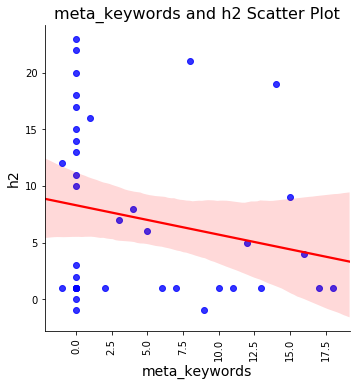

<Figure size 432x288 with 0 Axes>

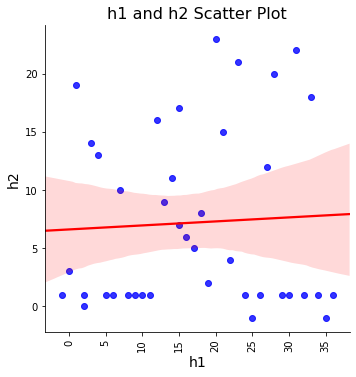

<Figure size 432x288 with 0 Axes>

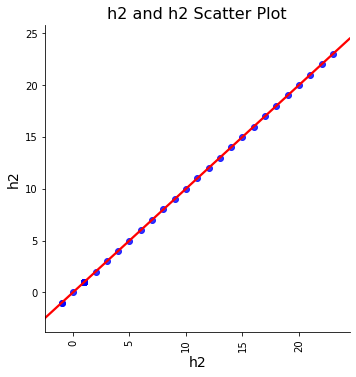

<Figure size 432x288 with 0 Axes>

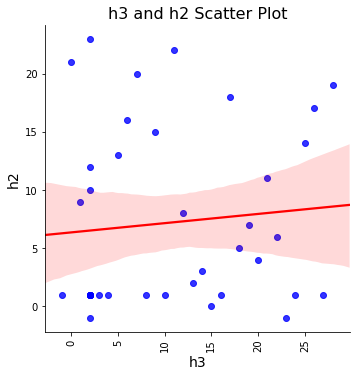

<Figure size 432x288 with 0 Axes>

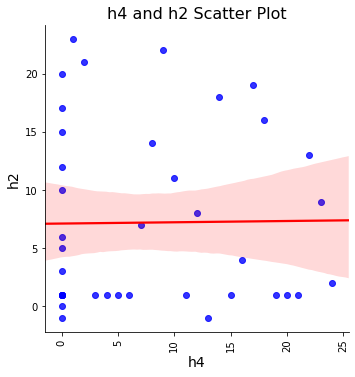

<Figure size 432x288 with 0 Axes>

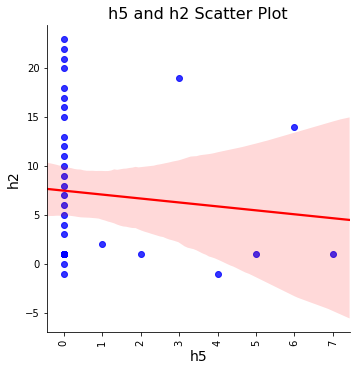

In [146]:
# Scatter Plot For Cheking the Variables correlation with a fitted regression line W.R.T 'H2' 
for i in col_names:
    diff_scattr(x=i,y='h2')

<Figure size 432x288 with 0 Axes>

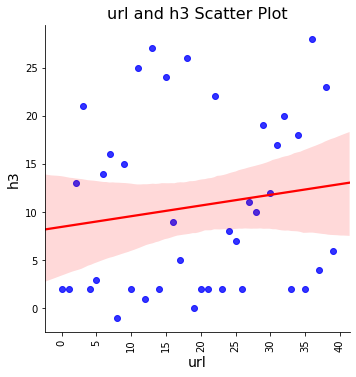

<Figure size 432x288 with 0 Axes>

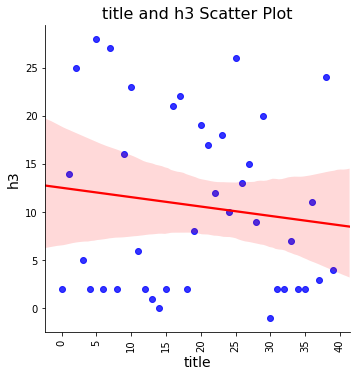

<Figure size 432x288 with 0 Axes>

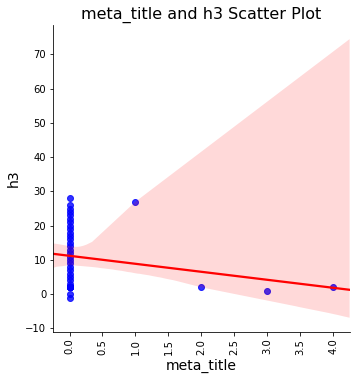

<Figure size 432x288 with 0 Axes>

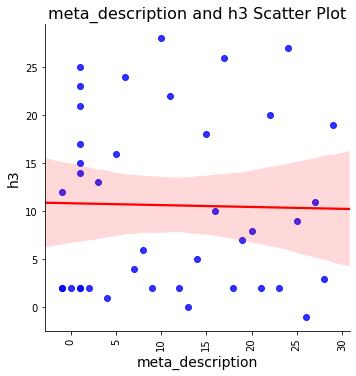

<Figure size 432x288 with 0 Axes>

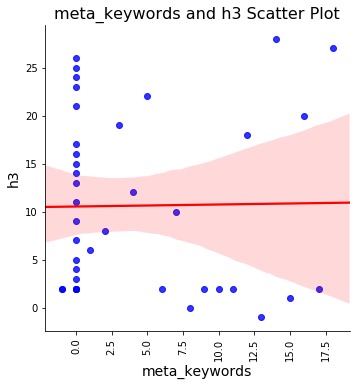

<Figure size 432x288 with 0 Axes>

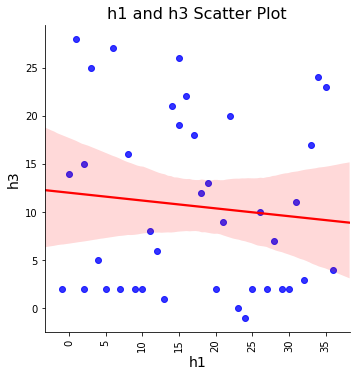

<Figure size 432x288 with 0 Axes>

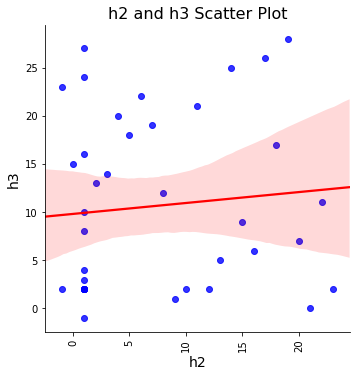

<Figure size 432x288 with 0 Axes>

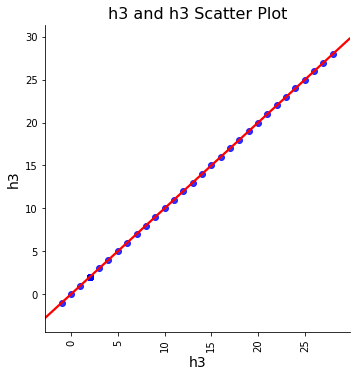

<Figure size 432x288 with 0 Axes>

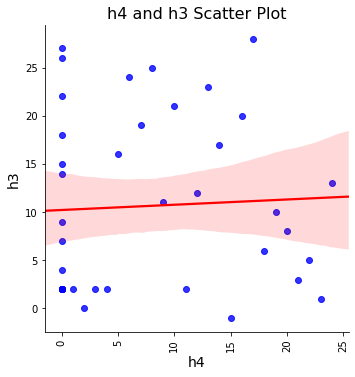

<Figure size 432x288 with 0 Axes>

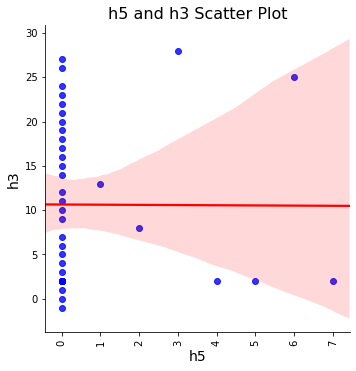

In [147]:
# Scatter Plot For Cheking the Variables correlation with a fitted regression line W.R.T 'H3' 
for i in col_names:
    diff_scattr(x=i,y='h3')

<Figure size 432x288 with 0 Axes>

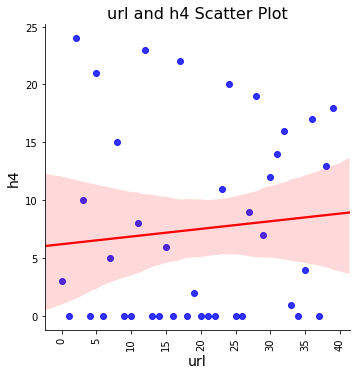

<Figure size 432x288 with 0 Axes>

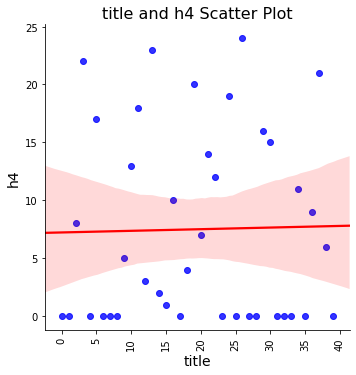

<Figure size 432x288 with 0 Axes>

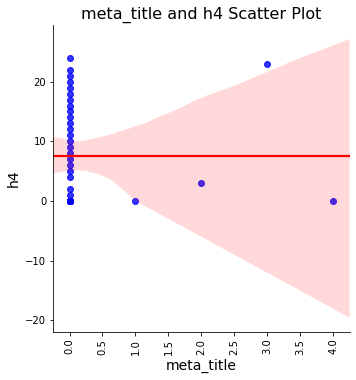

<Figure size 432x288 with 0 Axes>

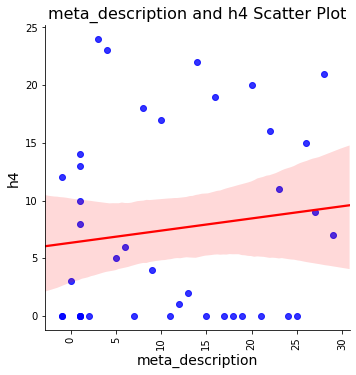

<Figure size 432x288 with 0 Axes>

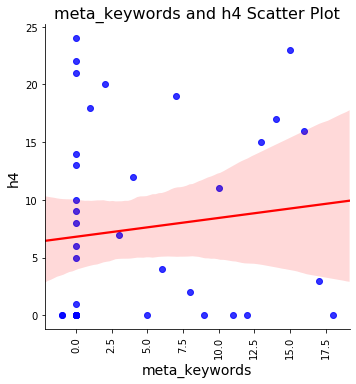

<Figure size 432x288 with 0 Axes>

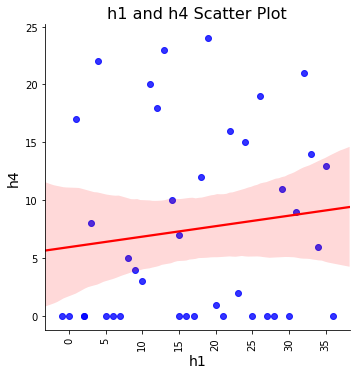

<Figure size 432x288 with 0 Axes>

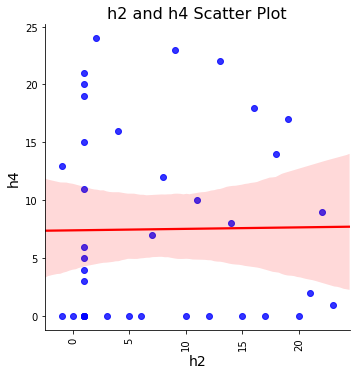

<Figure size 432x288 with 0 Axes>

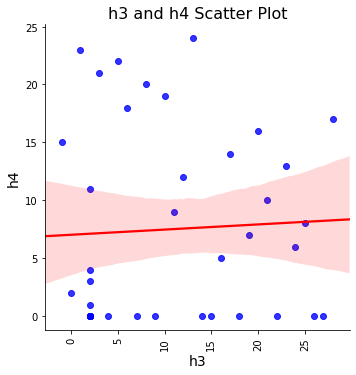

<Figure size 432x288 with 0 Axes>

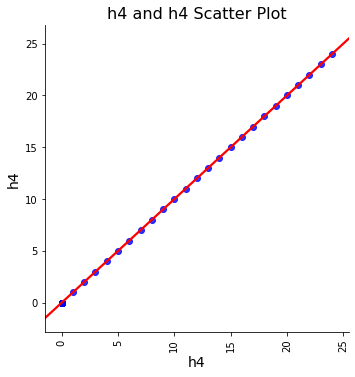

<Figure size 432x288 with 0 Axes>

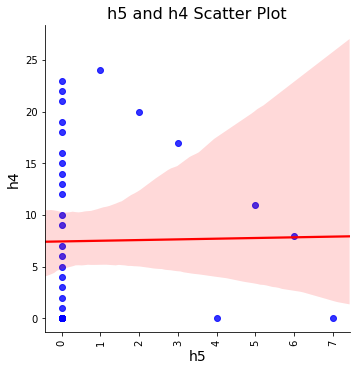

In [148]:
# Scatter Plot For Cheking the Variables correlation with a fitted regression line W.R.T 'H4' 
for i in col_names:
    diff_scattr(x=i,y='h4')

<Figure size 432x288 with 0 Axes>

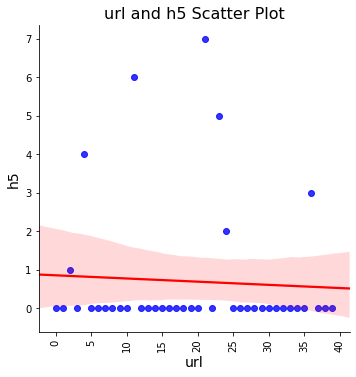

<Figure size 432x288 with 0 Axes>

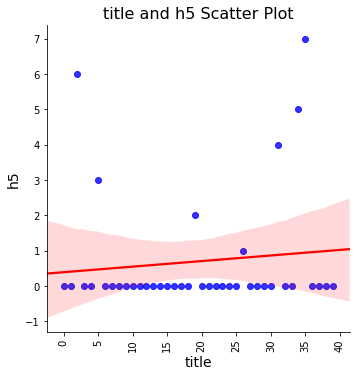

<Figure size 432x288 with 0 Axes>

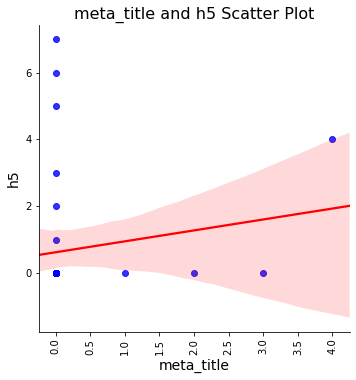

<Figure size 432x288 with 0 Axes>

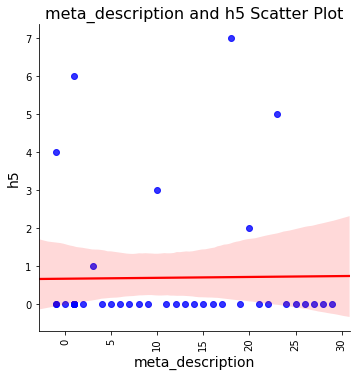

<Figure size 432x288 with 0 Axes>

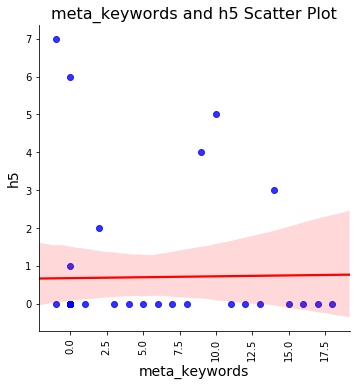

<Figure size 432x288 with 0 Axes>

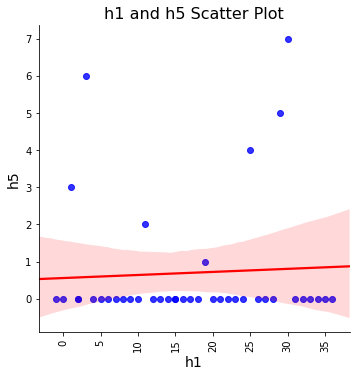

<Figure size 432x288 with 0 Axes>

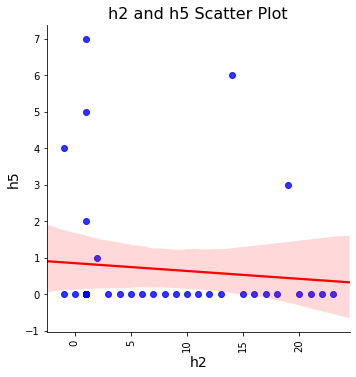

<Figure size 432x288 with 0 Axes>

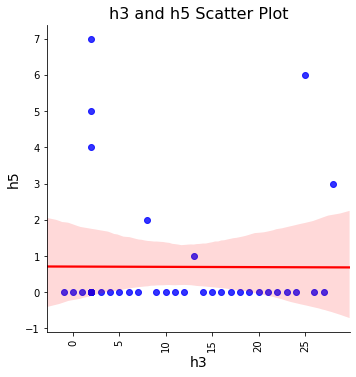

<Figure size 432x288 with 0 Axes>

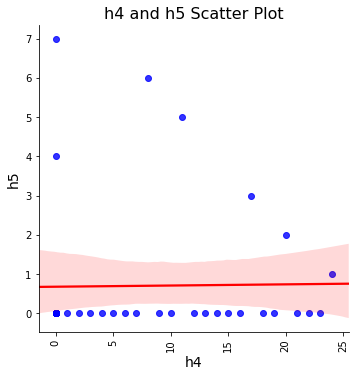

<Figure size 432x288 with 0 Axes>

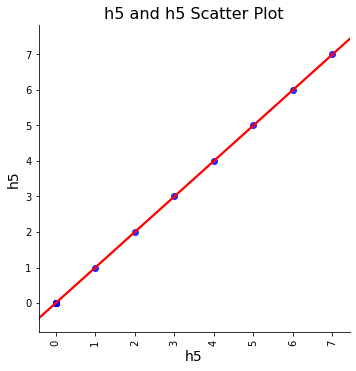

In [149]:
# Scatter Plot For Cheking the Variables correlation with a fitted regression line W.R.T 'H5' 
for i in col_names:
    diff_scattr(x=i,y='h5')

<Figure size 432x288 with 0 Axes>

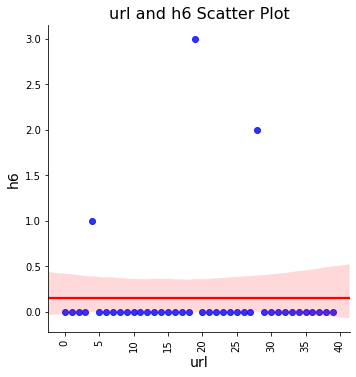

<Figure size 432x288 with 0 Axes>

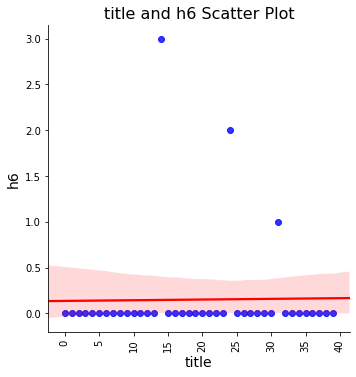

<Figure size 432x288 with 0 Axes>

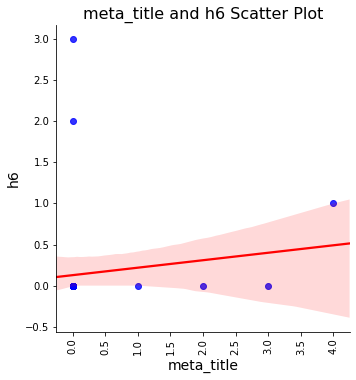

<Figure size 432x288 with 0 Axes>

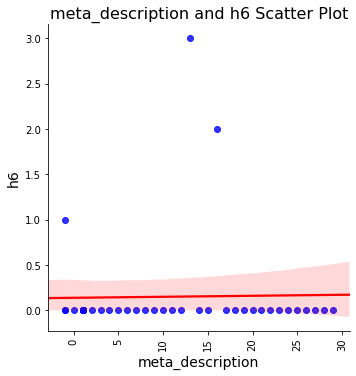

<Figure size 432x288 with 0 Axes>

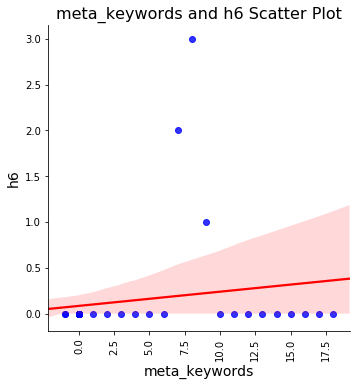

<Figure size 432x288 with 0 Axes>

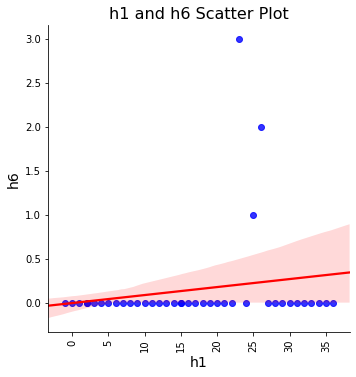

<Figure size 432x288 with 0 Axes>

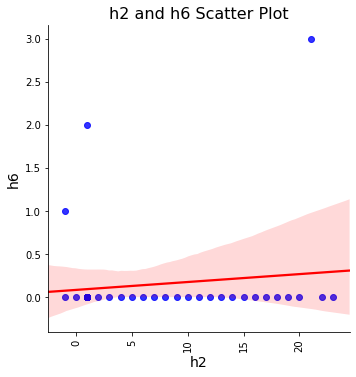

<Figure size 432x288 with 0 Axes>

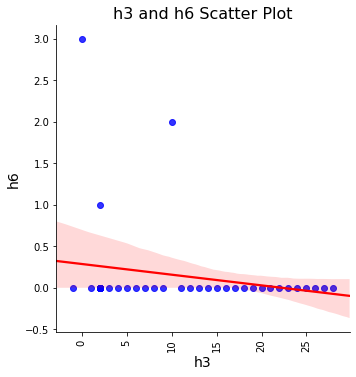

<Figure size 432x288 with 0 Axes>

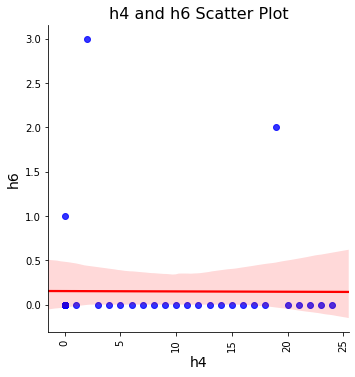

<Figure size 432x288 with 0 Axes>

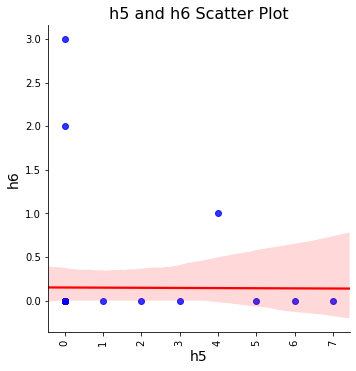

In [150]:
# Scatter Plot For Cheking the Variables correlation with a fitted regression line W.R.T 'H6' 
for i in col_names:
    diff_scattr(x=i,y='h6')

In [151]:
feat_imp_ep = Match_EP.copy()

feat_imp_ep = feat_imp_ep.replace(('YES','NO'),(1,0))

In [152]:
feat_imp_ep = feat_imp_ep.fillna(0)

# Checking Which Features are Most Important for Exact Phrase Match in Dataset

In [153]:
# Checking Features Importances for Position-1 URL
# Lets drop some of the columns
from sklearn.ensemble import ExtraTreesRegressor
regressor = ExtraTreesRegressor(n_estimators=300)
X = feat_imp_ep
y = feat_imp_ep
regressor.fit(X,y)
feat_imp = pd.DataFrame({'Features':feat_imp_ep.columns,
                         'importance':regressor.feature_importances_})
feat_imp.sort_values(by = 'importance', ascending=False).reset_index(drop=True)

Features  importance
0                       url_match    0.441290
1                        h1_match    0.131575
2                 url_h2_presence    0.065622
3                        h2_match    0.043409
4             meta_keywords_match    0.035903
5      url_meta_keywords_presence    0.034391
6                        h3_match    0.032610
7                 url_h3_presence    0.031008
8          meta_description_match    0.026985
9   url_meta_description_presence    0.022336
10                url_h1_presence    0.020353
11                    title_match    0.019096
12             url_title_presence    0.016772
13        url_meta_title_presence    0.016679
14               meta_title_match    0.016236
15                url_h4_presence    0.014069
16                       h4_match    0.013883
17                url_h6_presence    0.006739
18                       h6_match    0.005000
19                       h5_match    0.003348
20                url_h5_presence    0.002696

In [154]:
# Making a copy of broad phrase match
feat_imp_bp = Match_BP.copy()

feat_imp_bp = feat_imp_bp.replace(('YES', 'NO'), (1,0))

In [155]:
feat_imp_bp = feat_imp_bp.fillna(0)

# Checking Which Features are Most Important for  Broad Phrase Match in Dataset

In [156]:
# Checking Features Importances for Position-1 URL 
# Lets drop some of the columns
from sklearn.ensemble import ExtraTreesRegressor
regressor = ExtraTreesRegressor(n_estimators=300)
X = feat_imp_bp
y = feat_imp_bp
regressor.fit(X,y)
feat_imp = pd.DataFrame({'Features':feat_imp_bp.columns,
                         'importance':regressor.feature_importances_})
feat_imp.sort_values(by = 'importance', ascending=False).reset_index(drop=True)

Features  importance
0                       url_match    0.196618
1                 url_h3_presence    0.083437
2                        h3_match    0.081656
3                        h2_match    0.078800
4                 url_h2_presence    0.078340
5      url_meta_keywords_presence    0.066468
6             meta_keywords_match    0.063093
7                 url_h4_presence    0.061117
8                        h4_match    0.060807
9                        h1_match    0.050385
10         meta_description_match    0.041677
11  url_meta_description_presence    0.038925
12               meta_title_match    0.026484
13        url_meta_title_presence    0.026257
14                       h5_match    0.011170
15                url_h5_presence    0.011121
16                url_h6_presence    0.006119
17                url_h1_presence    0.006087
18                       h6_match    0.004735
19             url_title_presence    0.003497
20                    title_match    0.003205

# Applying Linear Regression Algorithm 

In [157]:
# Importing Linear Regression Library and train-test-split library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Splitting the data into Train and Test Sets
X = In_Page_stats.drop(columns=['url'])
y = In_Page_stats['url']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Fitting the Model

In [158]:
# Fitting the Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
model = sm.OLS(y_train, X_train).fit()

# Evaluating the Model using Summary Statistics 

In [160]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    url   R-squared (uncentered):                 -46.215
Model:                            OLS   Adj. R-squared (uncentered):            -67.676
Method:                 Least Squares   F-statistic:                             -2.153
Date:                Fri, 15 Nov 2019   Prob (F-statistic):                        1.00
Time:                        13:06:22   Log-Likelihood:                         -121.54
No. Observations:                  32   AIC:                                      263.1
Df Residuals:                      22   BIC:                                      277.7
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [161]:
# Predict new test cases Linear Regression model
LR_Predict = lr_model.predict(X_test) 

In [162]:
def MAPE(y_true, y_pred):
    mape = np.mean(np.abs(y_true - y_pred) / y_true)
    return mape

# Verifying the Performance USING MAPE(Mean Absolute Percentage Error) Metric

In [163]:
MAPE(y_test, LR_Predict)

0.3147072537945706

In [ ]:
# import numpy as np
# import plotly.graph_objs as go
# import plotly.plotly as py
# import plotly.offline as offline

# a = df.loc[i]
# b = df.loc[i]
# c = df.loc[i]

# def histogram_wrapper(xyz):

#     trace = go.Scatter3d(
#         x=a,
#         y=b,
#         z=c,
#         opacity=0.75,
#         name = 'Position-1'
#         )
#     return trace


# trace1 = histogram_wrapper(a)
# trace2 = histogram_wrapper(b)
# trace3 = histogram_wrapper(c)

# data = go.Data([trace1])

# fig = go.Figure(data=data)
# offline.plot(fig, filename='exact_phrase_wrapper.html')

In [ ]:

# def plotlyfig2json(fig, fpath):
#     """
#     Serialize a plotly figure object to JSON so it can be persisted to disk.
#     Figure's persisted as JSON can be rebuilt using the plotly JSON chart API:

#     http://help.plot.ly/json-chart-schema/

#     If `fpath` is provided, JSON is written to file.

#     Modified from https://github.com/nteract/nteract/issues/1229
#     """

#     redata = json.loads(json.dumps(fig.data, cls=PlotlyJSONEncoder))
#     relayout = json.loads(json.dumps(fig.layout, cls=PlotlyJSONEncoder))

#     fig_json=json.dumps({'data': redata,'layout': relayout})

#     if fpath:
#         with open(fpath, 'w') as f:
#             f.write(fig_json)
#     else:
#         return fig_json

# def plotlyfromjson(fpath):
#     """Render a plotly figure from a json file"""
#     with open(fpath, 'r') as f:
#         v = json.loads(f.read())

#     fig = go.Figure(data=v['data'], layout=v['layout'])
#     iplot(fig, show_link=False)

# ## Minimial demo ##

# n = 1000
# trace = go.Scatter(
#     x = np.random.randn(n),
#     y = np.random.randn(n),
#     mode = 'markers')

# #img_byte = pio.to_image(fig, format='png')

# fig = go.Figure(data=[trace])
# #iplot(fig)
# plotlyfig2json(fig, 'myfile.json')
# plotlyfromjson('myfile.json')

In [ ]:
# import base64

# data = {}
# with open('url_ep.jpg', mode='rb') as file:
#     img = file.read()
# data['img'] = base64.encodebytes(img).decode("utf-8")

# print(json.dumps(data))

In [ ]:
# In the column 'raw', extract the word in the strings
# InPageOpt_BP['h6_matched'] = InPageOpt_BP['h6'].str.extract('(artificial intelligence in healthcare market)', expand=True)
# InPageOpt_BP['h6_matched']


# Checking for exact match of focus keyword in each row now
# mask = np.column_stack([InPageOpt_BP[col].str.contains("artificial-intelligence-in-healthcare", na=False) for col in InPageOpt_BP])
# InPageOpt_BP.loc[mask.any(axis=1)]


# Checking for exact match of focus keyword in each row now
# mask = np.column_stack([InPageOpt_BP[col].str.contains("artificial intelligence in healthcare", na=False) for col in InPageOpt_BP])
# InPageOpt_BP.loc[mask.any(axis=1)]


# Checking for exact match of focus keyword in each row now
# mask = np.column_stack([InPageOpt_BP[col].str.contains("artificial intelligence in healthcare market", na=False) for col in InPageOpt_BP])
# InPageOpt_BP.loc[mask.any(axis=1)]


#InPageOpt_BP[InPageOpt_BP['url'].str.contains('artificial-intelligence-in-healthcare-market')][['url','title','meta_title','meta_description','meta_keywords','h1','h2','h3','h4','h5','h6']]

#InPageOpt_BP.apply(lambda row: row.astype(str).str.contains('artificial intelligence in healthcare market').any(), axis=1)

In [ ]:
# # Defining Function for Exact Focus Keyword Match
# Focus_keyword = input(pd.read_csv())

# def matching_func(file):
#     file = pd.read_csv(fin)
#     pattern = '|'.join(file[col1].tolist())
#     file1['new_col'] = file[col1].map(lambda x: re.search(pattern, x).group()\
#                                              if re.search(pattern, x) else None)



# import re
# match = 'artificial-intelligence-in-healthcare-market'
# pattern = '|'.join(match)

# def test_for_pattern(data):
#     if data.str.contains(pattern):
#         return pattern
#     else:
#         return x


# m = InPageOpt['url'].str.contains('artificial-intelligence-in-healthcare-market') 
# InPageOpt['matched'] = np.where(m, 'yes', 'no')
# InPageOpt

In [ ]:
# import pandas as pd

# df=pd.read_csv('DATA2.csv')

# Search_for_These_values = ['PEA', 'DEF', 'XYZ'] #creating list

# pattern = '|'.join(Search_for_These_values)     # joining list for comparision

# IScritical=df['COLUMN_to_Check'].str.contains(pattern)
# for CHECK in IScritical:
#     if not CHECK:
#         print CHECK
#         df['NEWcolumn']='NO'
#     else:
#         print CHECK
#         df['NEWcolumn']='YES'

# df.to_csv('OUPUT.csv')

In [ ]:
# # Merging Exact Phrase and Broad Phrase DataFrames
# Merged_EP_BP_Frames = [Match_EP, Match_BP]

# Merged_EP_BP = pd.concat(Merged_EP_BP_Frames,ignore_index=True)

# #Merged_EP_BP

# # Renaming Column Index to Rank
# Merged_EP_BP.index = Merged_EP_BP.index.set_names(['Ranks'])
# Merged_EP_BP.head()

# # Index Starting from 0 and making it start from 1 for The Referencing It as Top Rank from {1}
# Merged_EP_BP.index += 1
# Merged_EP_BP.head()

In [ ]:
# for row in URL_EP_Presence.itertuples(index = True):
#     if URL_EP_Presence.columns.any() == "YES":
#         print('url is present')
#     else:
#         print('url is not present')
#     print(row)

# for row in URL_EP_Presence.iterrows():
#     if URL_EP_Presence.columns.any() == "YES":
#         print('url is present')
#     else:
#         print('url is not present')
#     print(row)
    
# for row in URL_EP_Presence.iteritems():
#     if URL_EP_Presence.columns.any() == "YES":
#         print('url is present')
#     else:
#         print('url is not present')
#     print(row)

In [ ]:
# def url_presence(df, text):
#     for item, row in df.iterrows():
#         item = df.columns
#         if item.all() == text:
#             print('url is present')
#         else:
#             print('url is not present')
#     return item

# data_dict = URL_EP_Presence.to_dict()
# def mapper(data):
#     if data[1] == "YES":
#         return data[0]
# def data_getter(dict_data, keys):
#     final_url_list = []
#     for data in dict_data["url_actual_url"]:
#         if data in keys:
#             final_url_list.append(dict_data["url_actual_url"][data])
#     return final_url_list
            
    
# for i in data_dict.keys():
#     if i == "url_title_presence":
#         map_data = list(map(mapper, data_dict[i].items()))
#         result = list(filter(None, map_data))
# print(data_getter(data_dict, result))

# data_dict = URL_EP_Presence.to_dict()
# def mapper(data):
#     if data[1] == "YES":
#         return data[0]
# def data_getter(dict_data, keys):
#     final_url_list = []
#     for data in dict_data["url_actual_url"]:
#         if data in keys:
#             final_url_list.append(dict_data["url_actual_url"][data])
#     return final_url_list
            
    
# for i in data_dict.keys():
#     if i == "url_meta_title_presence":
#         map_data = list(map(mapper, data_dict[i].items()))
#         result = list(filter(None, map_data))
# print(data_getter(data_dict, result))

# data_dict = URL_EP_Presence.to_dict()
# def mapper(data):
#     if data[1] == "YES":
#         return data[0]
# def data_getter(dict_data, keys):
#     final_url_list = []
#     for data in dict_data["url_actual_url"]:
#         if data in keys:
#             final_url_list.append(dict_data["url_actual_url"][data])
#     return final_url_list
            
    
# for i in data_dict.keys():
#     if i == "url_meta_description_presence":
#         map_data = list(map(mapper, data_dict[i].items()))
#         result = list(filter(None, map_data))
# print(data_getter(data_dict, result))

# URL_EP_Presence.loc[1].str.findall('YES')